# Ein Machine Learning Projekt

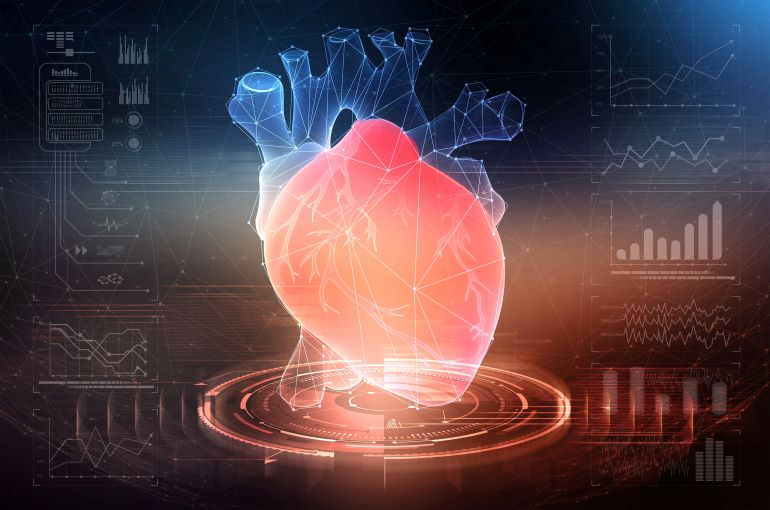
Quelle: https://www.bhf.org.uk/what-we-do/our-research/research-successes/artificial-intelligence-and-heart-attack

# 1. Projektbeschreibung


## 1.1 Projekttitel:
### Analyse des Zehn-Jahres-Risikos für koronare Herzkrankheiten (TenYearCHD)

## 1.2 Hintergrund und Fragestellung


Koronare Herzkrankheiten (KHK), auch bekannt als koronare Arterienerkrankung (KAE) oder ischämische Herzkrankheit (IHK), bezieht sich auf eine Gruppe von Erkrankungen, bei denen die Blutversorgung des Herzmuskels beeinträchtigt ist. Die Hauptursache für KHK ist die Ansammlung von Fett, Cholesterin und anderen Substanzen, die als Plaque in den Koronararterien (die Blutgefäße, die das Herz mit Blut versorgen) auftreten. Diese Plaques können die Arterien verengen oder blockieren, was zu einer reduzierten Blutversorgung des Herzmuskels führt.

Die wichtigsten Arten von KHK-Erkrankungen umfassen:

Angina Pectoris,Myokardinfarkt (Herzinfarkt), Chronische KHK, Instabile Angina.

**Weltweit:**
Die Weltgesundheitsorganisation (WHO) schätzte, dass Herz-Kreislauf-Erkrankungen für einen erheblichen Anteil der weltweiten Todesfälle verantwortlich sind. Laut WHO-Daten von 2019 entfielen etwa 32% aller Todesfälle weltweit auf Herz-Kreislauf-Erkrankungen.

**Deutschland:**
In Deutschland waren Herz-Kreislauf-Erkrankungen ebenfalls eine der häufigsten Todesursachen. Laut Daten des Statistischen Bundesamtes für das Jahr 2019 machten Herz-Kreislauf-Erkrankungen mehr als 30% aller Todesfälle in Deutschland aus.

Die Risikofaktoren für KHK umfassen Rauchen, Bluthochdruck, hohe Cholesterinwerte, Diabetes, Übergewicht, mangelnde körperliche Aktivität und genetische Veranlagung. 
Die Prävention und Kontrolle dieser Risikofaktoren sind entscheidend, um das Risiko für KHK zu reduzieren. 




<span style="background-color: yellow;"> 
Dieses Projekt zielt darauf ab, die relevantesten/riskantesten Faktoren für Herzerkrankungen zu identifizieren und das Gesamtrisiko mithilfe eines Machine Learning Modells vorherzusagen.
</span>

## 1.4 Datenquelle:

Die in diesem Projekt verwendeten Daten stammen von: https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset/code

## 1.5 Konkrete Aufgabenstellung

- Das Hauptziel dieses Projekts ist es, das TenYearCHD für Koronare Herzkrankheit (KHK) anhand eines Datensatzes zu untersuchen und vorherzusagen.

- Analyse der Merkmale im Datensatz, um deren Eignung zur Vorhersage des TenYearCHD für KHK zu bestimmen.
- Entwicklung von Vorhersagemodellen mithilfe von maschinellem Lernen, um das TenYearCHD basierend auf den ausgewählten Merkmalen zu prognostizieren.

- Bewertung der Leistung der entwickelten Modelle unter Verwendung geeigneter Bewertungsmetriken (z.B. Genauigkeit, Präzision, Rückruf, ROC-Kurve), um deren Vorhersagefähigkeit zu bestimmen.

- Interpretation der Ergebnisse, um die einflussreichsten Faktoren zu identifizieren, die zum Zehn-Jahres-Risiko für KHK beitragen.

# 2. Praktische Umsetzung: vor der Modellentwicklung

## 2.1 Datenbereitstellung

### 2.1.1 Import der notwendigen Bibliotheken


In [295]:
#!conda install plotly

In [297]:
# Bibliotheken für die Datenanalyse
import numpy as np
import pandas as pd

# Bibliotheken für die Visualisierung

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

%matplotlib inline

# Das Einblenden von "Warnungen" ausschalten
import warnings
warnings.filterwarnings('ignore')


# Bibliothek für ML
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 2.1.2 Einlesen der Daten und erster Datenüberblick

In [299]:
df=pd.read_csv('framingham.csv')
#Quelle: https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset/code

In [300]:
df.head(5)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

Die Variablen sind wie folgt:

* [1] Geschlecht (male): Das Geschlecht der Beobachtungen. Die Variable ist binär kodiert: "männlich"=1, "weiblich"=0

* [2] Alter (age): Das Alter der Personen zum Zeitpunkt der medizinischen Untersuchung in Jahren.

* [3] Bildung (education): Eine kategoriale Variable, die das Bildungsniveau der Teilnehmer angibt. Die Stufen sind: Einige High School (1), High School/GED (2), einige College/Berufsschule (3), College (4).

* [4] Aktueller Raucher (currentSmoker): Gibt an, ob die Person zum Zeitpunkt der Untersuchung aktuell raucht. Kodierung: Ja=1, Nein=0.
* [5] Zigaretten pro Tag (cigsPerDay): Die Anzahl der täglich gerauchten Zigaretten.

* [6] Blutdruckmedikation (BPmeds): Gibt an, ob die Person blutdrucksenkende Medikamente einnimmt. Kodierung: Ja=1, Nein=0.

* [7] Schlaganfall (prevalentStroke): gibt an, ob die Person jemals einen Schlaganfall hatte. Kodierung: Ja=1, Nein=0.

* [8] Hypertonie (prevalentHyp): Gibt an, ob bei der Person bereits Hypertonie diagnostiziert wurde. Kodierung: Ja=1, Nein=0.

* [9] Diabetes: Gibt an, ob die Person Diabetiker ist.

* [10] Gesamtcholesterin (totChol): Gesamtcholesterin (mg/dL).

* [11] Systolischer Blutdruck (sysBP): Systolischer Blutdruck (mmHg).

* [12] Diastolischer Blutdruck (diaBP): Diastolischer Blutdruck (mmHg).

* [13] Body-Mass-Index (BMI): Body-Mass-Index, Gewicht (kg) / Größe (m)^2.

* [14] Herzfrequenz (heartRate): Herzfrequenz (Schläge/Minute).

* [15] Blutzucker (glucose): Blutzuckerspiegel (mg/dL).

* [16] Zehn-Jahres-KHK (TenYearCHD): Das 10-Jahres-Risiko für Koronare Herzkrankheit (KHK).(ja=1,nein=0)

Quelle:https://github.com/GauravPadawe/Framingham-Heart-Study/blob/master/Framingham%20Heart%20Study.ipynb



In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [302]:
#Statistische Zusammenfassung der df
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

**Erste Beobachtungen:**

Der Datensatz ist eine eher kleine Teilmenge des möglichen FHS-Datensatzes( "Framingham Heart Study") und umfasst:
**4240 Beobachtungen und 16 Variablen**

**Es gibt Fehlede Werte beonders in glucose- Spalte**

**Alter:  Alter des Probanden von 32 bis 70.**

**Zigaretten pro Tag :0- 70 zigaretten pro Tag**

**Cholesterinspiegel: in unserem Datensatz beträgt Min Cholesterinspiegel 107, während Max. ist 696.**

**Systolischer Blutdruck: Min systolische Blutdruck beträgt 83, während Max. ist 295.**

**Diastolische Blutdruck: min diastolische Blutdruck beträgt 48, während Max. ist 142.**

**Der Body-Mass-Index in unserem Datensatz schwankt zwischen 15,54 bis 56.**

**Die beobachtete Herzfrequenz in unserer Fallstudie beträgt 44 bis 143.**

**Blutzucker liegt zwischen 40 und 394.**


### 2.1.3 Bereinigung der Daten

#### 2.1.3.1 Fehlende Werte

In [303]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

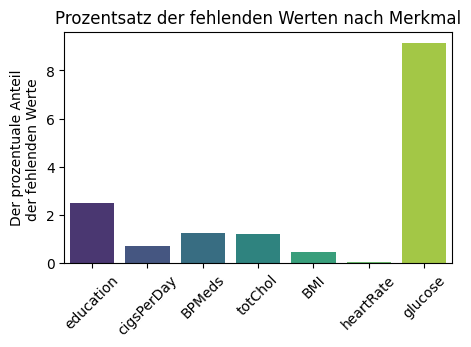

In [304]:
#Prozentsatz der fehlenden Werte pro Feature berechnen
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage.values > 0]
# visualizieren in Barplot
plt.figure(figsize=(5, 3))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette="viridis")

# Hinzufügen von Beschriftungen und Titel
plt.title('Prozentsatz der fehlenden Werten nach Merkmal')
plt.xlabel('')
plt.ylabel('Der prozentuale Anteil\nder fehlenden Werte ')
plt.xticks(rotation=45) 

# Anzeigen des Diagramms
plt.show()

### Problematik mit fehlenden Daten:

Die Effizienz von Maschine-Learning-Modellen kann durch das Vorhandensein von fehlenden Werten erheblich beeinträchtigt werden. Daher ist es von entscheidender Bedeutung, angemessene Strategien zur Behandlung fehlender Daten zu implementieren, um eine effektive Schulung der Modelle zu gewährleisten.

### Strategien zur Bewältigung fehlender Daten:

1. **Entfernen der Zeile:**
   - Weniger bevorzugte Option.
   - Kann zum Verlust wichtiger Werte führen.

2. **Imputierung (Ersetzen):**
   - **a) Univariate Imputierung (eindimensional):** (Werkzeug: Simple Imputer)
     - Numerische Daten:
       - Füllung z.B. mit Durchschnitt/Median, wenn:
         - Daten vollständig zufällig fehlen.
         - Fehlende Daten weniger als 5% ausmachen.
     - Kategoriale Daten:
       - Füllung mit Modalwert oder dem Wort 'MISSING'.

   - **b) Multivariate Imputierung (mehrdimensional):**
     - Füllen mehrerer Werte gleichzeitig in mehreren Spalten mit z.B. dem KNN Impute Algorithmus.

 Quelle: Comparison of Missing Data Imputation Methods using the Framingham Heart study dataset
 unter: https://arxiv.org/pdf/2210.03154.pdf

In [305]:
# Eine Funktion, die die Spaltennamen mit Fehlenden werten
#(die weniger als 5% der  Datensatz macht) zurückbringt

def finden_col_mit_w5pro_null(cols):
    col_mit_w5pro_null=[]
    for col  in cols:
        if df[col].isnull().mean() < 0.05 and df[col].isnull().mean() > 0:
            col_mit_w5pro_null.append(col)
    return col_mit_w5pro_null

finden_col_mit_w5pro_null(df.columns)

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

### cigsPerDay

In [306]:
(df[df['currentSmoker']==0].cigsPerDay != 0).any()
# Bei Nicht-Rauchern ist Anzahl der Zigarennten immer 0

False

In [307]:
# Berechne die Mittelwert von gerauchte Zigaretten am Tag under den Rauchern
# Ersetze NAN durch den Mittelwert Zahll der gerauchten Zigaretten am Tag bei den Rauchern

mittelwert_der_cig_unter_der_rauchern= df[df['currentSmoker']==1]['cigsPerDay'].mean()
mean_cigsPerDay=int(mittelwert_der_cig_unter_der_rauchern)
df['cigsPerDay'] = df['cigsPerDay'].fillna(mean_cigsPerDay)

### heartRate

In [308]:
#Einfach durch den Mittelwerk ersetzen
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())

### education

In [309]:
df['education']= df['education'].fillna(np.random.choice([1, 2, 3, 4]))
#fehlende Werte in der Bildungsspalte durch eine zufällig ausgewählte Bildungsstufe zu ersetzen. 

### BPMeds, totChol und BMI

Um multivariate Imputation mit dem KNN-Imputer in einer bestimmten Spalte durchzuführen, 
verwend ich die KNNImputer-Klasse aus der sklearn.impute-Bibliothek

In [310]:
from sklearn.impute import KNNImputer , SimpleImputer


# Extrahieren der relevanten Spalten für den KNN-Imputer
columns_to_impute = ['BPMeds', 'totChol', 'BMI'] 

#eine Kopie des DataFrame mit den ausgewählten Spalte  Erstellen
df_subset = df[columns_to_impute].copy()

# Initialisieren des KNN-Imputers
knn_imputer = KNNImputer(n_neighbors=1)  # ich habe hier die Anzahl der Nachbarn auf 1 angepasst

#die fehlenden Werte in der ausgewählten Spalte füllen
df_subset_imputed = knn_imputer.fit_transform(df_subset)

#die Originaldaten mit den imputierten Werten aktualisieren
#Indexierungsmethode(loc) --> 
#alle Zeilen (:), und nur die Spalten, die in der Liste columns_to_impute aufgeführt sind.
#imputierten Werte (die aus dem KNN-Imputer stammen)
df.loc[:, columns_to_impute] = df_subset_imputed


Zusammengefasst:
Der bereitgestellte Code verwendet den KNN-Imputer aus der sklearn.impute-Bibliothek, um fehlende Werte in den ausgewählten Spalten ('BPMeds', 'totChol', 'BMI') zu imputieren.
Dieser Schritt wird als Imputation bezeichnet und hilft dabei, fehlende Daten durch plausible Schätzungen zu ersetzen. 
Die k-NN-Imputation wird in diesem Fall mit n_neighbors=1 durchgeführt, was bedeutet, dass der nächste Nachbar zur Imputation verwendet wird.

In [311]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

### glucose

Die Anwendung von Imputationsstrategien, insbesondere wenn der Prozentsatz der fehlenden Werte hoch ist, kann potenziell die Leistung des Modells beeinträchtigen.
Das Merkmal 'glucose' weist den höchsten Prozentsatz an fehlenden Daten auf, etwa 9%.
Andere Merkmale haben minimal fehlende Daten.

Das Einsetzen fehlender Werte, besonders in einem Gesundheitsdatensatz, könnte Verzerrungen verursachen.

In einigen Fällen können fehlende Werte nicht einfach durch statistische Maßnahmen ersetzt werden. Imputationsmethoden könnten dann unrealistische Schätzungen liefern.

In einigen Fällen kann es sinnvoll sein, die Zeilen mit fehlenden Werten zu entfernen, wenn dies vertretbar ist. 
Die Rücksprache mit Fachleuten ist entscheidend.


In [312]:
#Fehlende Werte löschen
df = df.dropna(axis = 0)

#### 2.1.3.2 Korrektur Datentyp der Variablen




Die Änderung des Datentyps kann sinnvoll sein, um sicherzustellen, dass die Daten korrekt repräsentiert werden und dass die gewählten Algorithmen gut mit dem Datentyp arbeiten können. Es ist wichtig zu beachten, dass bei dieser Art von Änderungen keine neuen Daten hinzugefügt werden, sondern nur die Art und Weise, wie sie dargestellt werden, angepasst wird.

hier habe ich den Datentyp bestimmter Spalten im DataFrame wie folgt geändert


In [313]:
df['education'] = df['education'].astype(int)
df['cigsPerDay'] = df['cigsPerDay'].astype(int)
df['BPMeds'] = df['BPMeds'].astype(int)
df['heartRate'] = df['heartRate'].astype(int)
df['glucose'] = df['glucose'].astype(int)

## 2.2 Feature Engineering:
**Optimierung des Feature Engineerings:**

Feature Engineering ist ein kreativer Prozess, der darauf abzielt, den Datensatz so zu gestalten, dass Modelle bessere Muster erkennen und präzisere Vorhersagen treffen können. Hier sind einige Aspekte des Feature Engineerings:

1. **Neue Merkmale erstellen:**
   - *Basiert auf Domänenwissen:* Schaffe neue Merkmale, die direkt aus dem Domänenwissen oder der spezifischen Problemstellung abgeleitet sind.
   - *Kombination von Merkmalen:* Erstelle Kombinationen vorhandener Merkmale, um potenziell aussagekräftigere Beziehungen zur gewünschten Ausgabe zu schaffen.

2. **Transformation bestehender Merkmale:**
   - *Mathematische Operationen:* Wende mathematische Operationen wie Logarithmen, Quadratwurzeln oder Potenzen auf existierende Merkmale an, um nichtlineare Beziehungen zu erfassen.
   - *Skalierung und Normalisierung:* Passe Merkmale an, um sicherzustellen, dass sie auf einer vergleichbaren Skala liegen, was die Leistung von Modellen verbessern kann.
   - *Binning oder Diskretisierung:* Gruppiere kontinuierliche Merkmale in Bins, um nichtlineare Muster zu erfassen oder Rauschen zu reduzieren.

Feature Engineering ist ein iterativer Prozess, der eine enge Zusammenarbeit zwischen Datenexperten und Modellierern erfordert. Durch die gezielte Schaffung und Transformation von Merkmalen können Modelle besser auf die zugrunde liegenden Muster im Datensatz reagieren und präzisere Vorhersagen liefern.


### 2.2.1 Erstellung der neuen Merkmale (Alter_in_Gruppen)

In [314]:
df['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 35, 60, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69])

In [315]:
# Zunächst Erstellung eines neuen Dataframes "df2" (eine Kopie von "df")
df2 = df.copy()

Alter in Altersgrouppe teilen:

30-39 Jahre --> 0
40-49 Jahre --> 1
50-59 Jahre --> 2
60-70 Jahre --> 3

pd.cut(): Dies ist eine Funktion aus der Pandas-Bibliothek, die dazu verwendet wird, 
numerische Daten in diskrete Intervalle (Bins) zu unterteilen. In diesem Fall werden die Altersdaten in die angegebenen Intervalle unterteilt.


In [316]:
#bins=[30, 39, 49, 59, 70]: Hier werden die Grenzen der Intervalle festgelegt.
df2['ageGroup'] = pd.cut(x=df['age'], bins=[30,39, 49, 59, 70], 
                          labels=[0,1,2,3])
df2.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39          4              0           0       0                0   
1     0   46          2              0           0       0                0   
2     1   48          1              1          20       0                0   
3     0   61          3              1          30       0                0   
4     0   46          3              1          23       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97         80       77   
1             0         0    250.0  121.0   81.0  28.73         95       76   
2             0         0    245.0  127.5   80.0  25.34         75       70   
3             1         0    225.0  150.0   95.0  28.58         65      103   
4             0         0    285.0  130.0   84.0  23.10         85       85   

   TenYearCHD ageGroup  
0           0        0  
1           0        1  
2           0        1  
3           1        3  
4           0        1

### 2.2.2 Erstellung der neuen Merkmale (BP_Normal)

Der Blutdruck wird in zwei Werten ausgedrückt: systolischer und diastolischer Blutdruck. Die Einheit ist in der Regel Millimeter Quecksilbersäule (mmHg). Der Blutdruck gibt den Druck an, den das Blut auf die Wände der Blutgefäße ausübt, und wird in der Form "systolischer/diastolischer Druck" ausgedrückt. Hier sind typische Normalwerte:

Systolischer Blutdruck:

Der höhere Wert, der den Druck im Gefäßsystem während der Kontraktion des Herzens (der Herzschlagphase) darstellt.
Normalerweise wird er als erster Wert in der Blutdruckmessung angegeben.
Ein normaler systolischer Blutdruck liegt typischerweise 120-129 mmHg.
Diastolischer Blutdruck:

Der niedrigere Wert, der den Druck im Gefäßsystem zwischen den Herzschlägen oder während der Entspannungsphase des Herzens darstellt.
Normalerweise wird er als zweiter Wert in der Blutdruckmessung angegeben.
Ein normaler diastolischer Blutdruck liegt typischerweise 80-84 mmHg.
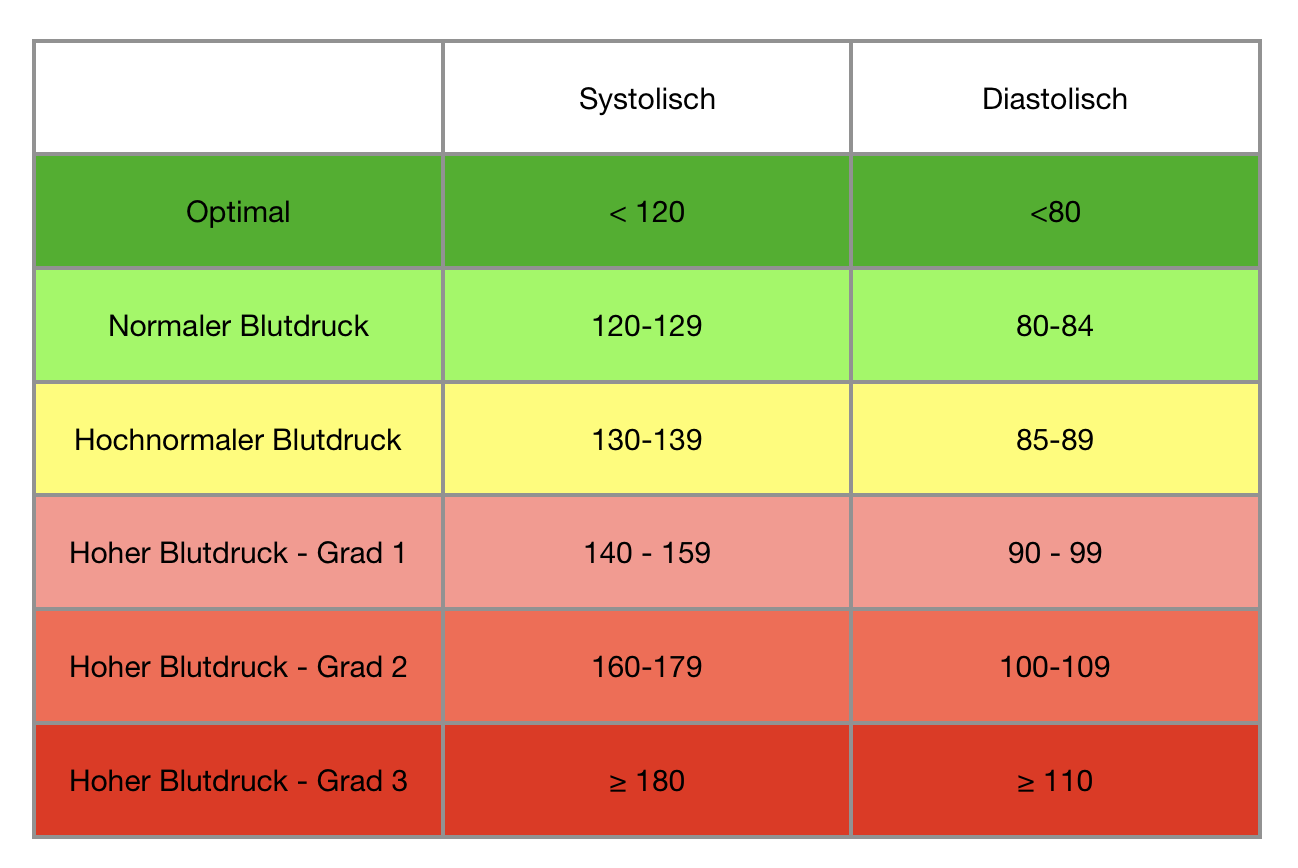
Quelle: https://hyper10sion.com/faq/wie-hoch-ist-der-normale-blutdruck


In [317]:
# Funktion zur Überprüfung des Blutdrucks im typischen Bereich
def ist_typischer_blutdruck(sysBP, diaBP):
    typischer_sysBP_bereich = (129)
    typischer_diaBP_bereich = (84)

    return sysBP <= typischer_sysBP_bereich and \
          diaBP <= typischer_diaBP_bereich

# Neues Merkmal 'Blutdruck_typisch' erstellen
df2['Blutdruck_typisch'] = df2.apply(lambda row: 1 if ist_typischer_blutdruck(row['sysBP'], row['diaBP']) else 0, axis=1)
df2.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39          4              0           0       0                0   
1     0   46          2              0           0       0                0   
2     1   48          1              1          20       0                0   
3     0   61          3              1          30       0                0   
4     0   46          3              1          23       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97         80       77   
1             0         0    250.0  121.0   81.0  28.73         95       76   
2             0         0    245.0  127.5   80.0  25.34         75       70   
3             1         0    225.0  150.0   95.0  28.58         65      103   
4             0         0    285.0  130.0   84.0  23.10         85       85   

   TenYearCHD ageGroup  Blutdruck_typisch  
0           0        0                  1  
1           0        1                  1  
2           0        1                  1  
3           1        3                  0  
4           0        1                  0

### 2.2.3 Erstellung der neuen Merkmale(BP_unbehandelt)

Ich habe auch ein weiteres neues Merkmal erstellt, das als 'BP_unbehandelt' bezeichnet wird. Hierbei habe ich untersucht, ob Personen mit unbehandeltem hohem Blutdruck ein geringeres Risiko für Herzkrankheiten haben im Vergleich zu denen, die behandelt werden. Dies ermöglicht es uns, die Auswirkungen von unbehandeltem Bluthochdruck auf das Herzkrankheitsrisiko genauer zu betrachten und zu verstehen.

In [318]:
#neues Merkmal erstellen
df2['BP_unbehandelt'] = df2.apply(lambda row: 1 if row['prevalentHyp'] == 1 and row['BPMeds'] == 0 else 0, axis=1)

### 2.2.4 Erstellung der neuen Merkmale(BP_Defferenz)

Ich habe auch ein neues Merkmal namens 'BPDifference' erstellt, das die Differenz zwischen dem systolischen und diastolischen Blutdruck misst. Diese Differenz könnte zusätzliche Informationen über die Blutdruckdynamik liefern und uns helfen, spezifischere Einblicke in die individuelle Blutdruckregulation zu gewinnen. Es ist bekannt, dass der systolische und diastolische Blutdruck unterschiedliche Aspekte der Herz-Kreislauf-Gesundheit widerspiegeln, und die Analyse ihrer Differenz könnte uns dabei unterstützen, subtilere Muster und Zusammenhänge zu entdecken.

In [319]:
#Das Differenz Merkmal zwischen systolischem und diastolischem Blutdruck erstellen. 
df2['BPDifference'] = df2['sysBP'] - df2['diaBP']
df2.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39          4              0           0       0                0   
1     0   46          2              0           0       0                0   
2     1   48          1              1          20       0                0   
3     0   61          3              1          30       0                0   
4     0   46          3              1          23       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97         80       77   
1             0         0    250.0  121.0   81.0  28.73         95       76   
2             0         0    245.0  127.5   80.0  25.34         75       70   
3             1         0    225.0  150.0   95.0  28.58         65      103   
4             0         0    285.0  130.0   84.0  23.10         85       85   

   TenYearCHD ageGroup  Blutdruck_typisch  BP_unbehandelt  BPDifference  
0           0        0                  1               0          36.0  
1           0        1                  1               0          40.0  
2           0        1                  1               0          47.5  
3           1        3                  0               1          55.0  
4           0        1                  0               0          46.0

### 2.2.5 Erstellung der neuen Merkmale(Frauen_in_Menopause)

Die Menopause tritt im Alter zwischen 45 und 55 Jahren ein, durchschnittlich mit 51 Jahren und ist der Zeitpunkt der letzten vom Eierstock gesteuerten Regelblutung. Bei Eintritt der Menopause ist die ovarielle Reserve vollständig aufgebraucht.
Quelle:https://wechseljahre-verstehen.de/wechseljahre/wann-treten-die-wechseljahre-auf/?etcc_med=SEA&etcc_par=Google&etcc_cmp=Wechseljahre&etcc_grp=Wechseljahre_Beginn&etcc_bky=wechseljahre%20wann&gclid=CjwKCAiAmZGrBhAnEiwAo9qHiSzbLEpSMjQYMWDlYsOb3QuG2351ytRsF5jb-R45nXp-sgKrGWHp3xoC2cAQAvD_BwE



In [320]:
df2['Frauen_in_Menopause'] = df2.apply(lambda row: 1 if row['male'] == 0 and row['ageGroup'] >= 2 else 0, axis=1)


In [321]:
df2['Männer_ü_50'] = df2.apply(lambda row: 1 if row['male'] == 1 and row['ageGroup'] >= 2 else 0, axis=1)


### 2.2.6 Erstellung der neuen Merkmale(BMI_totChol)


Um bestimmte Gruppen von Menschen genauer zu identifizieren, habe ich ein neues Merkmal erstellt, das sich auf Personen mit einem höheren BMI und einem höheren Cholesterinspiegel konzentriert.
Das Ziel ist es, nicht nur Personen mit einem höheren BMI zu berücksichtigen, sondern auch solche mit potenziell erhöhtem Risiko aufgrund beider Faktoren, nämlich BMI und Cholesterinspiegel.

Für gesunde Menschen mit niedrigem Risiko gelten folgende Richtwerte: 

**Gesamtcholesterin <190 mg/dl = 5,0 mmol/l.** 

**BMI 18,5 – 24,9	Normalgewicht**
Ich habe ein Merkmal namens BMI_totChol geschaffen, das den Wert 1 hat, wenn sowohl der BMI größer oder gleich 25 als auch der Gesamtcholesterinspiegel größer oder gleich 190 sind. Andernfalls hat es den Wert 0.

Es ist wichtig zu beachten, dass dieses neue Merkmal nicht unbedingt bedeutet, dass es eine direkte Ursache für Herzkrankheiten gibt. Es dient eher dazu, bestimmte Gruppen von Menschen zu identifizieren, die möglicherweise genauer betrachtet werden sollten.


In [322]:
df2['BMI_totChol'] = df2.apply(lambda row: 1 if row['BMI'] >= 25 and row['totChol'] >= 190 else 0, axis=1)
df2.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39          4              0           0       0                0   
1     0   46          2              0           0       0                0   
2     1   48          1              1          20       0                0   
3     0   61          3              1          30       0                0   
4     0   46          3              1          23       0                0   

   prevalentHyp  diabetes  totChol  ...  heartRate  glucose  TenYearCHD  \
0             0         0    195.0  ...         80       77           0   
1             0         0    250.0  ...         95       76           0   
2             0         0    245.0  ...         75       70           0   
3             1         0    225.0  ...         65      103           1   
4             0         0    285.0  ...         85       85           0   

   ageGroup  Blutdruck_typisch  BP_unbehandelt BPDifference  \
0         0                  1               0         36.0   
1         1                  1               0         40.0   
2         1                  1               0         47.5   
3         3                  0               1         55.0   
4         1                  0               0         46.0   

   Frauen_in_Menopause  Männer_ü_50  BMI_totChol  
0                    0            0            1  
1                    0            0            1  
2                    0            0            1  
3                    1            0            1  
4                    0            0            0  

[5 rows x 23 columns]

## 2.3 Explorative Datenanalyse (EDA)


Zweck der EDA:

Die explorative Datenanalyse (EDA) wird genutzt, um Datensätze zu analysieren und ihre Hauptmerkmale zu verstehen und relevante Informationen zu extrahieren, bevor tiefere Analysen durchgeführt werden.

- Hauptmerkmalenverstehen

- Datenvisualisierung

- Hypothesen testen

- Vorbereitung für statistische Analysen






### 2.3.1 Hypothesen

Die Koronare Herzkrankheit (KHK) ist eine komplexe Erkrankung, und mehrere Faktoren können das Risiko für ihre Entwicklung beeinflussen

**1- Alter:**

Das Risiko für KHK steigt mit dem Alter. Besteht es ein signifikanter Zusammenhang zwischen Alter und dem Risiko für KHK?

**2-Geschlecht:**

Haben Männer in jungen Jahren ein höheres Risiko für Herzkrankheiten als Frauen, und zeigen unsere Daten dies?

**3- Frauen nach den Wechseljahren**

Ist das Risiko für Frauen nach den Wechseljahren genauso hoch wie das für Männer? 

**4- zusammenhang zwischen einem unbehandelten hohen Blutdruck das Risiko?**
Haben Menschen mit unbehandeltem hohen Blutdruck ein geringeres Risiko für koronare Herzkrankheit im Vergleich zu denen, die behandelt werden?

**5-Die Blutdruck Differenz:**
Könnte die Differenz zwischen systolischem und diastolischem Blutdruck zusätzliche Informationen über die Blutdruckdynamik liefern und somit mit einem höheren oder niedrigeren Risiko für koronare Herzkrankheit korrelieren?

**-Diabetes mellitus, Bluthochdruck, Hoher Cholesterinspiegel,Rauchen, Übergewicht und Fettleibigkeit**
Inwiefern beeinflussen die Faktoren Diabetes mellitus, Bluthochdruck, Hoher Cholesterinspiegel, Rauchen, Übergewicht und Fettleibigkeit das Risiko für koronare Herzkrankheit, und inwiefern könnten kombinierte Effekte dieser Faktoren eine Rolle spielen?

### 2.3.2 Hauptmerkmalenverstehen und analysieren

#### 2.3.2.1 Zielvariable

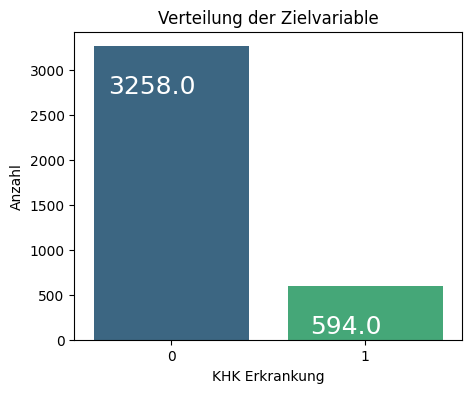

In [332]:
df3=df2.copy()
plt.figure(figsize=(5,4))
ax=sns.countplot(x='TenYearCHD', data=df3, palette="viridis")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=18)
plt.title('Verteilung der Zielvariable')
plt.xlabel('KHK Erkrankung')
plt.ylabel('Anzahl')
plt.show()

Ein wichtiger Aspekt, den wir bei der Analyse berücksichtigen müssen, ist die Verteilung unserer Zielvariable, nämlich die Koronare Herzkrankheit (KHK). Ein Blick auf das Countplot zeigt, dass wir eine signifikante Unausgewogenheit in unseren Daten haben. Die Anzahl der Menschen ohne KHK-Erkrankung beträgt 3258, während die Anzahl der Menschen mit KHK-Risiko nur 594 beträgt. Dies bedeutet, dass unsere Daten unausgewogen sind, und es ist wichtig, dies bei der Modellierung zu berücksichtigen. 

#### 2.3.2.2 Numerische Variablen


In [333]:
num_Merkmalen = ['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','BPDifference']

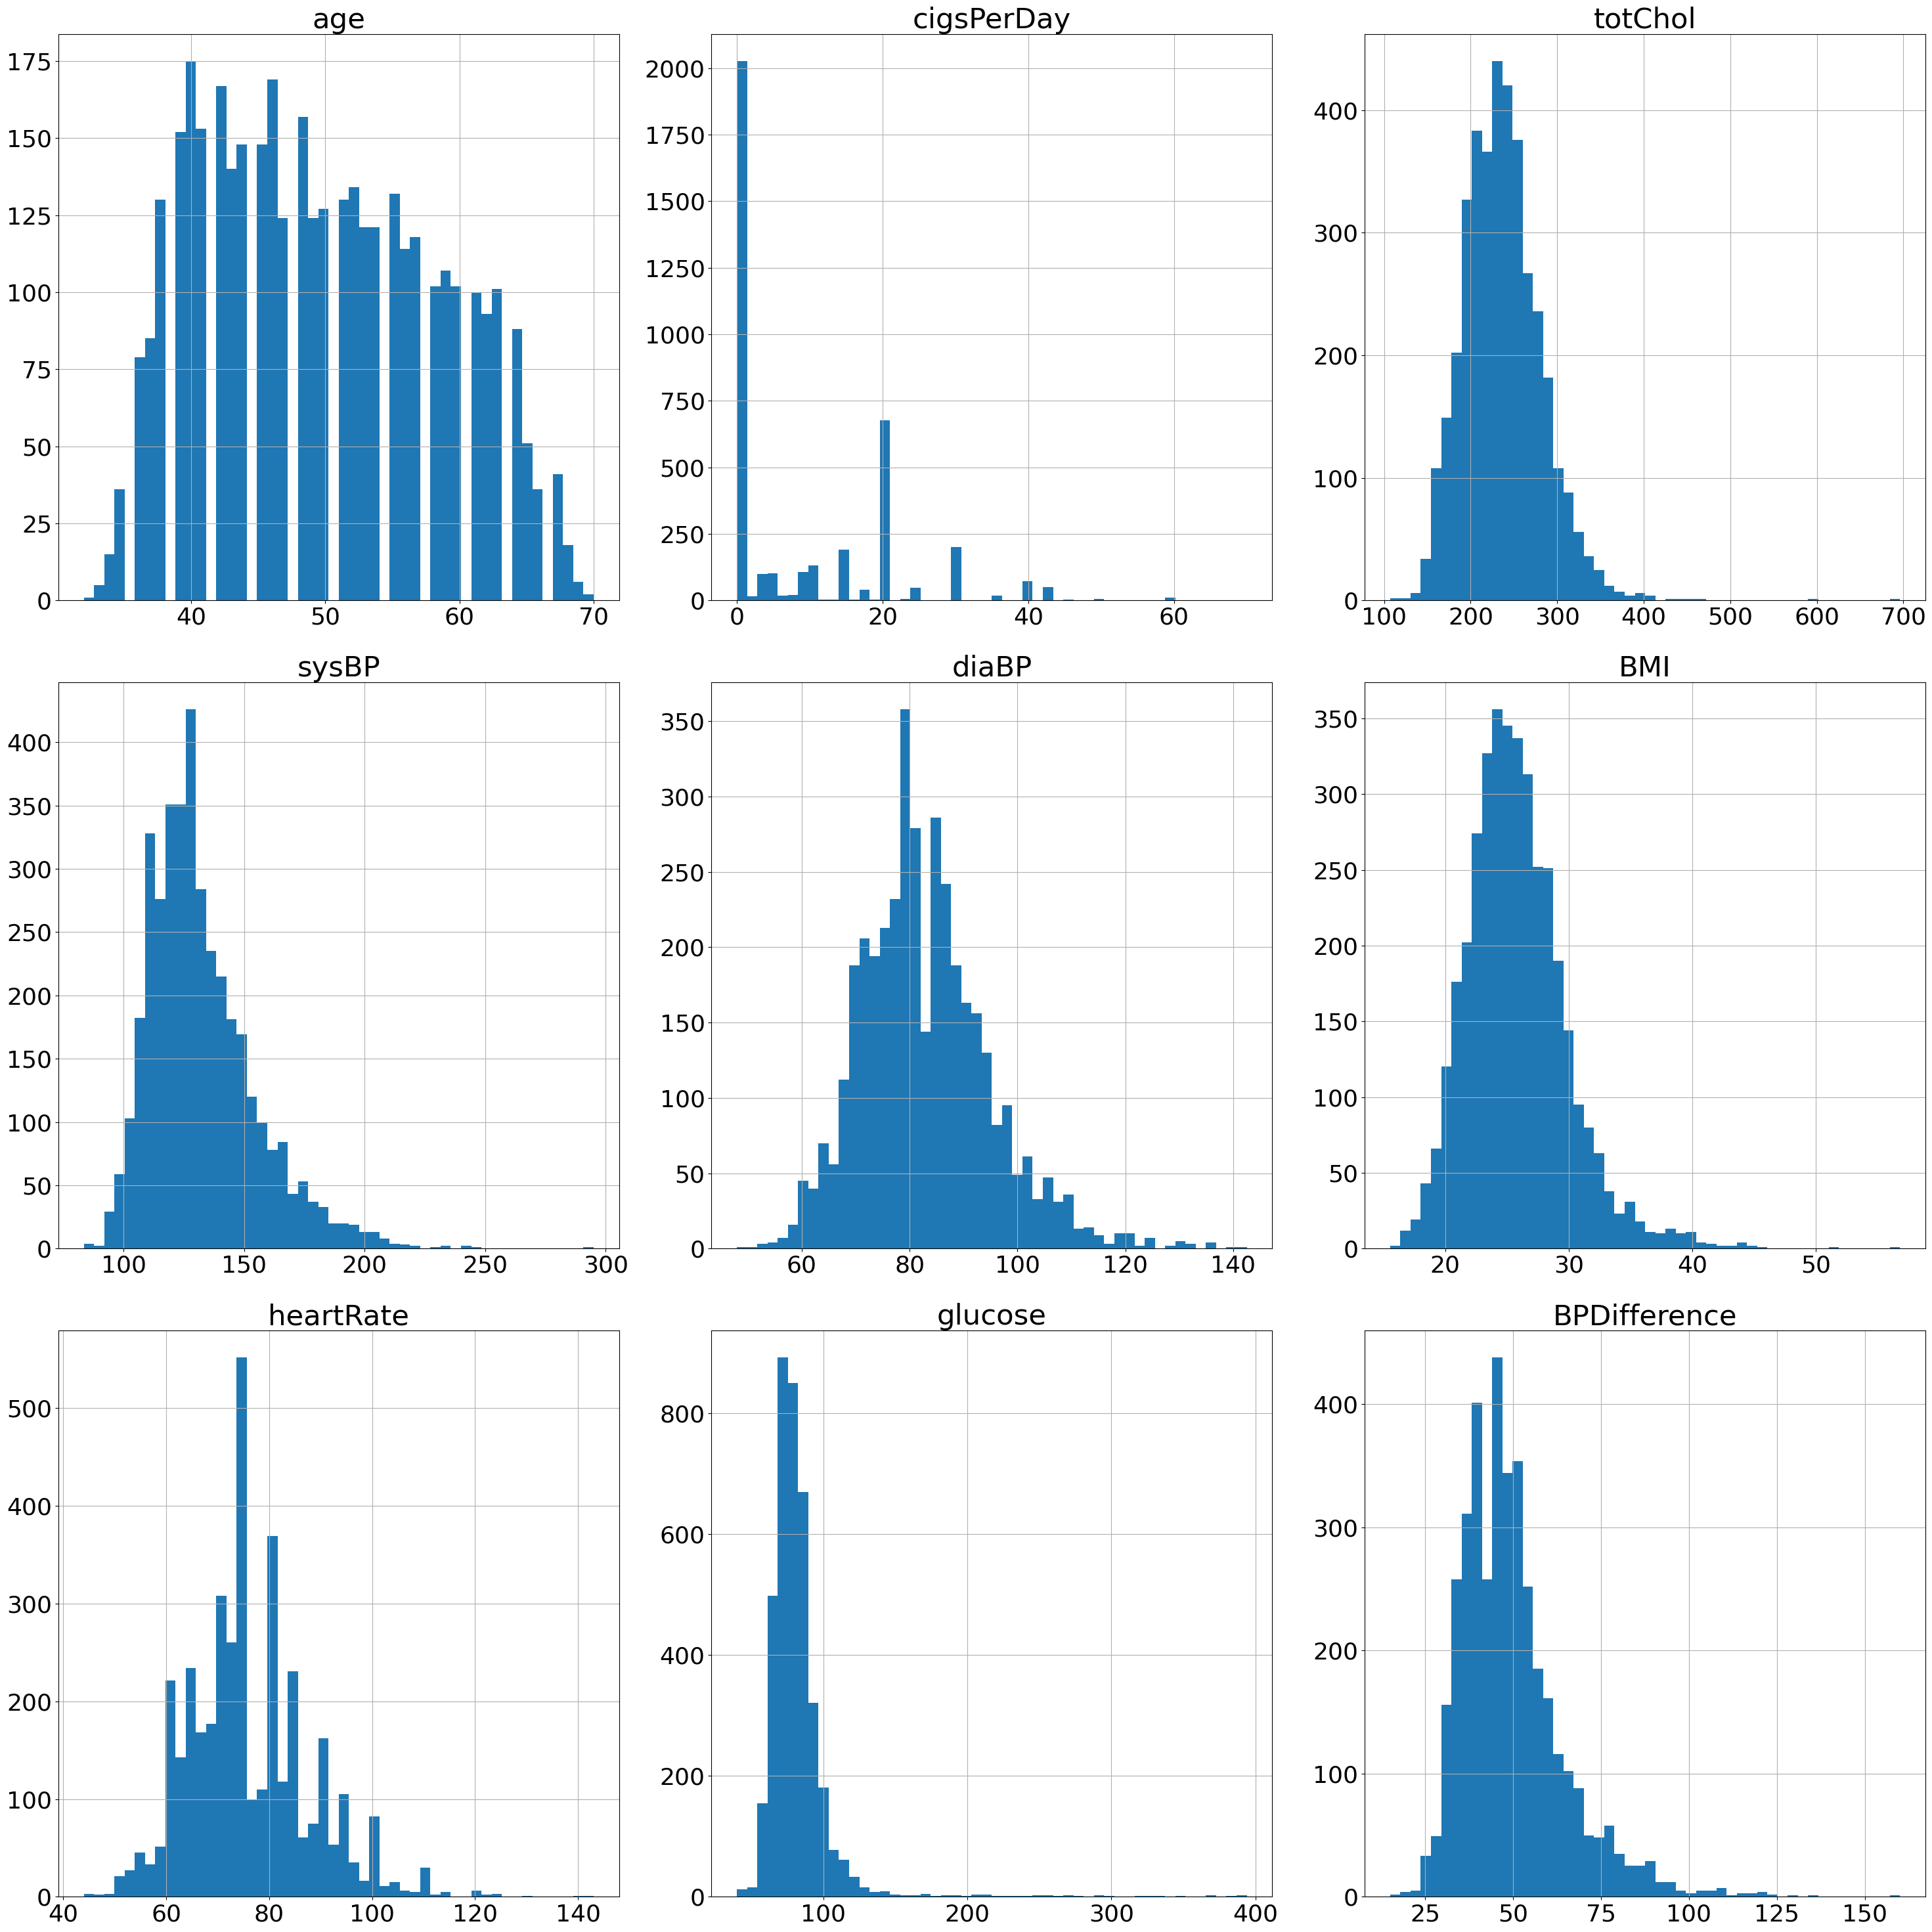

In [345]:
# Histogram plot für alle numerischen Variablen im Dataframe "df3"
# Bins der jeweiligen Variablen auf der  x-Achse, entsprechende counts auf der y-Achse
df3[num_Merkmalen].hist(figsize=(30,30),bins=50 );
plt.tight_layout()
#die Schriftgröße ändern
plt.rc('font', size=26)
plt.show()

Zigarettenkonsum pro Tag und Herzfrequenz zeigten eine stark ungleichmäßige Verteilung. 
Im Gegensatz dazu wiesen Glukose-, BMI-, diaBP-, sysBP- und Gesamtcholesterin  -Variablen eine gleichmäßigere Verteilung auf, die einer Normalverteilung ähnelte.

In [40]:
fig = px.box(df3, y=num_Merkmalen, title='Boxplot der numerischen Merkmale')
fig.update_layout(
    yaxis_title="Wert")
fig.show()

In einem Boxplot repräsentiert die y-Achse die Verteilung der Daten.

Box (Kasten): Die Box im Diagramm repräsentiert den Interquartilsbereich (IQR), der den Bereich zwischen dem 25. und 75. Perzentil der Daten abdeckt. Die Höhe der Box auf der y-Achse gibt an, wie weit die Daten im IQR gestreut sind.

Mittellinie (Median): Die horizontale Linie innerhalb der Box repräsentiert den Median der Daten. Der Median ist der Wert, der die Daten in zwei Hälften teilt.

Whiskers (Enden): Die Whiskers erstrecken sich von der Box zu den Datenpunkten außerhalb des IQR. Die Länge der Whiskers gibt an, wie weit die Daten über das IQR hinausgehen. Punkte, die über die Whiskers hinausgehen, werden als Ausreißer betrachtet.

Ausreißer: Datenpunkte, die über die Whiskers hinausgehen, werden als Ausreißer dargestellt, oft als einzelne Punkte.

Insgesamt gibt der Boxplot eine visuelle Darstellung der Verteilung und der Streuung der Daten. Die y-Achse repräsentiert die Skala der Daten, und die Position der Box und der Whiskers gibt Einblick in die zentrale Tendenz und die Streuung der Daten.

#### 2.3.2.3 Kategoriale Variablen

In [365]:
df3.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'ageGroup',
       'Blutdruck_typisch', 'BP_unbehandelt', 'BPDifference',
       'Frauen_in_Menopause', 'Männer_ü_50', 'BMI_totChol'],
      dtype='object')

In [370]:
kat_Merkmalen=['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 
                        'prevalentHyp', 'diabetes', 'ageGroup','Blutdruck_typisch', 'BP_unbehandelt', 
       'Frauen_in_Menopause','Männer_ü_50', 'BMI_totChol']


In [371]:
df3.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39          4              0           0       0                0   
1     0   46          2              0           0       0                0   
2     1   48          1              1          20       0                0   
3     0   61          3              1          30       0                0   
4     0   46          3              1          23       0                0   

   prevalentHyp  diabetes  totChol  ...  heartRate  glucose  TenYearCHD  \
0             0         0    195.0  ...         80       77           0   
1             0         0    250.0  ...         95       76           0   
2             0         0    245.0  ...         75       70           0   
3             1         0    225.0  ...         65      103           1   
4             0         0    285.0  ...         85       85           0   

   ageGroup  Blutdruck_typisch  BP_unbehandelt BPDifference  \
0         0                  1               0         36.0   
1         1                  1               0         40.0   
2         1                  1               0         47.5   
3         3                  0               1         55.0   
4         1                  0               0         46.0   

   Frauen_in_Menopause  Männer_ü_50  BMI_totChol  
0                    0            0            1  
1                    0            0            1  
2                    0            0            1  
3                    1            0            1  
4                    0            0            0  

[5 rows x 23 columns]

In [ ]:
#pip install --upgrade matplotlib seaborn

Der nächste Code erstellt mehrere Histogramme (Histplots) für verschiedene kategoriale Merkmale (variabel in kat_Merkmalen). Jedes Histogramm zeigt die Verteilung der Daten in Bezug auf das KHK-Risiko (TenYearCHD), indem es die Daten nach KHK-Risiko stapelt.

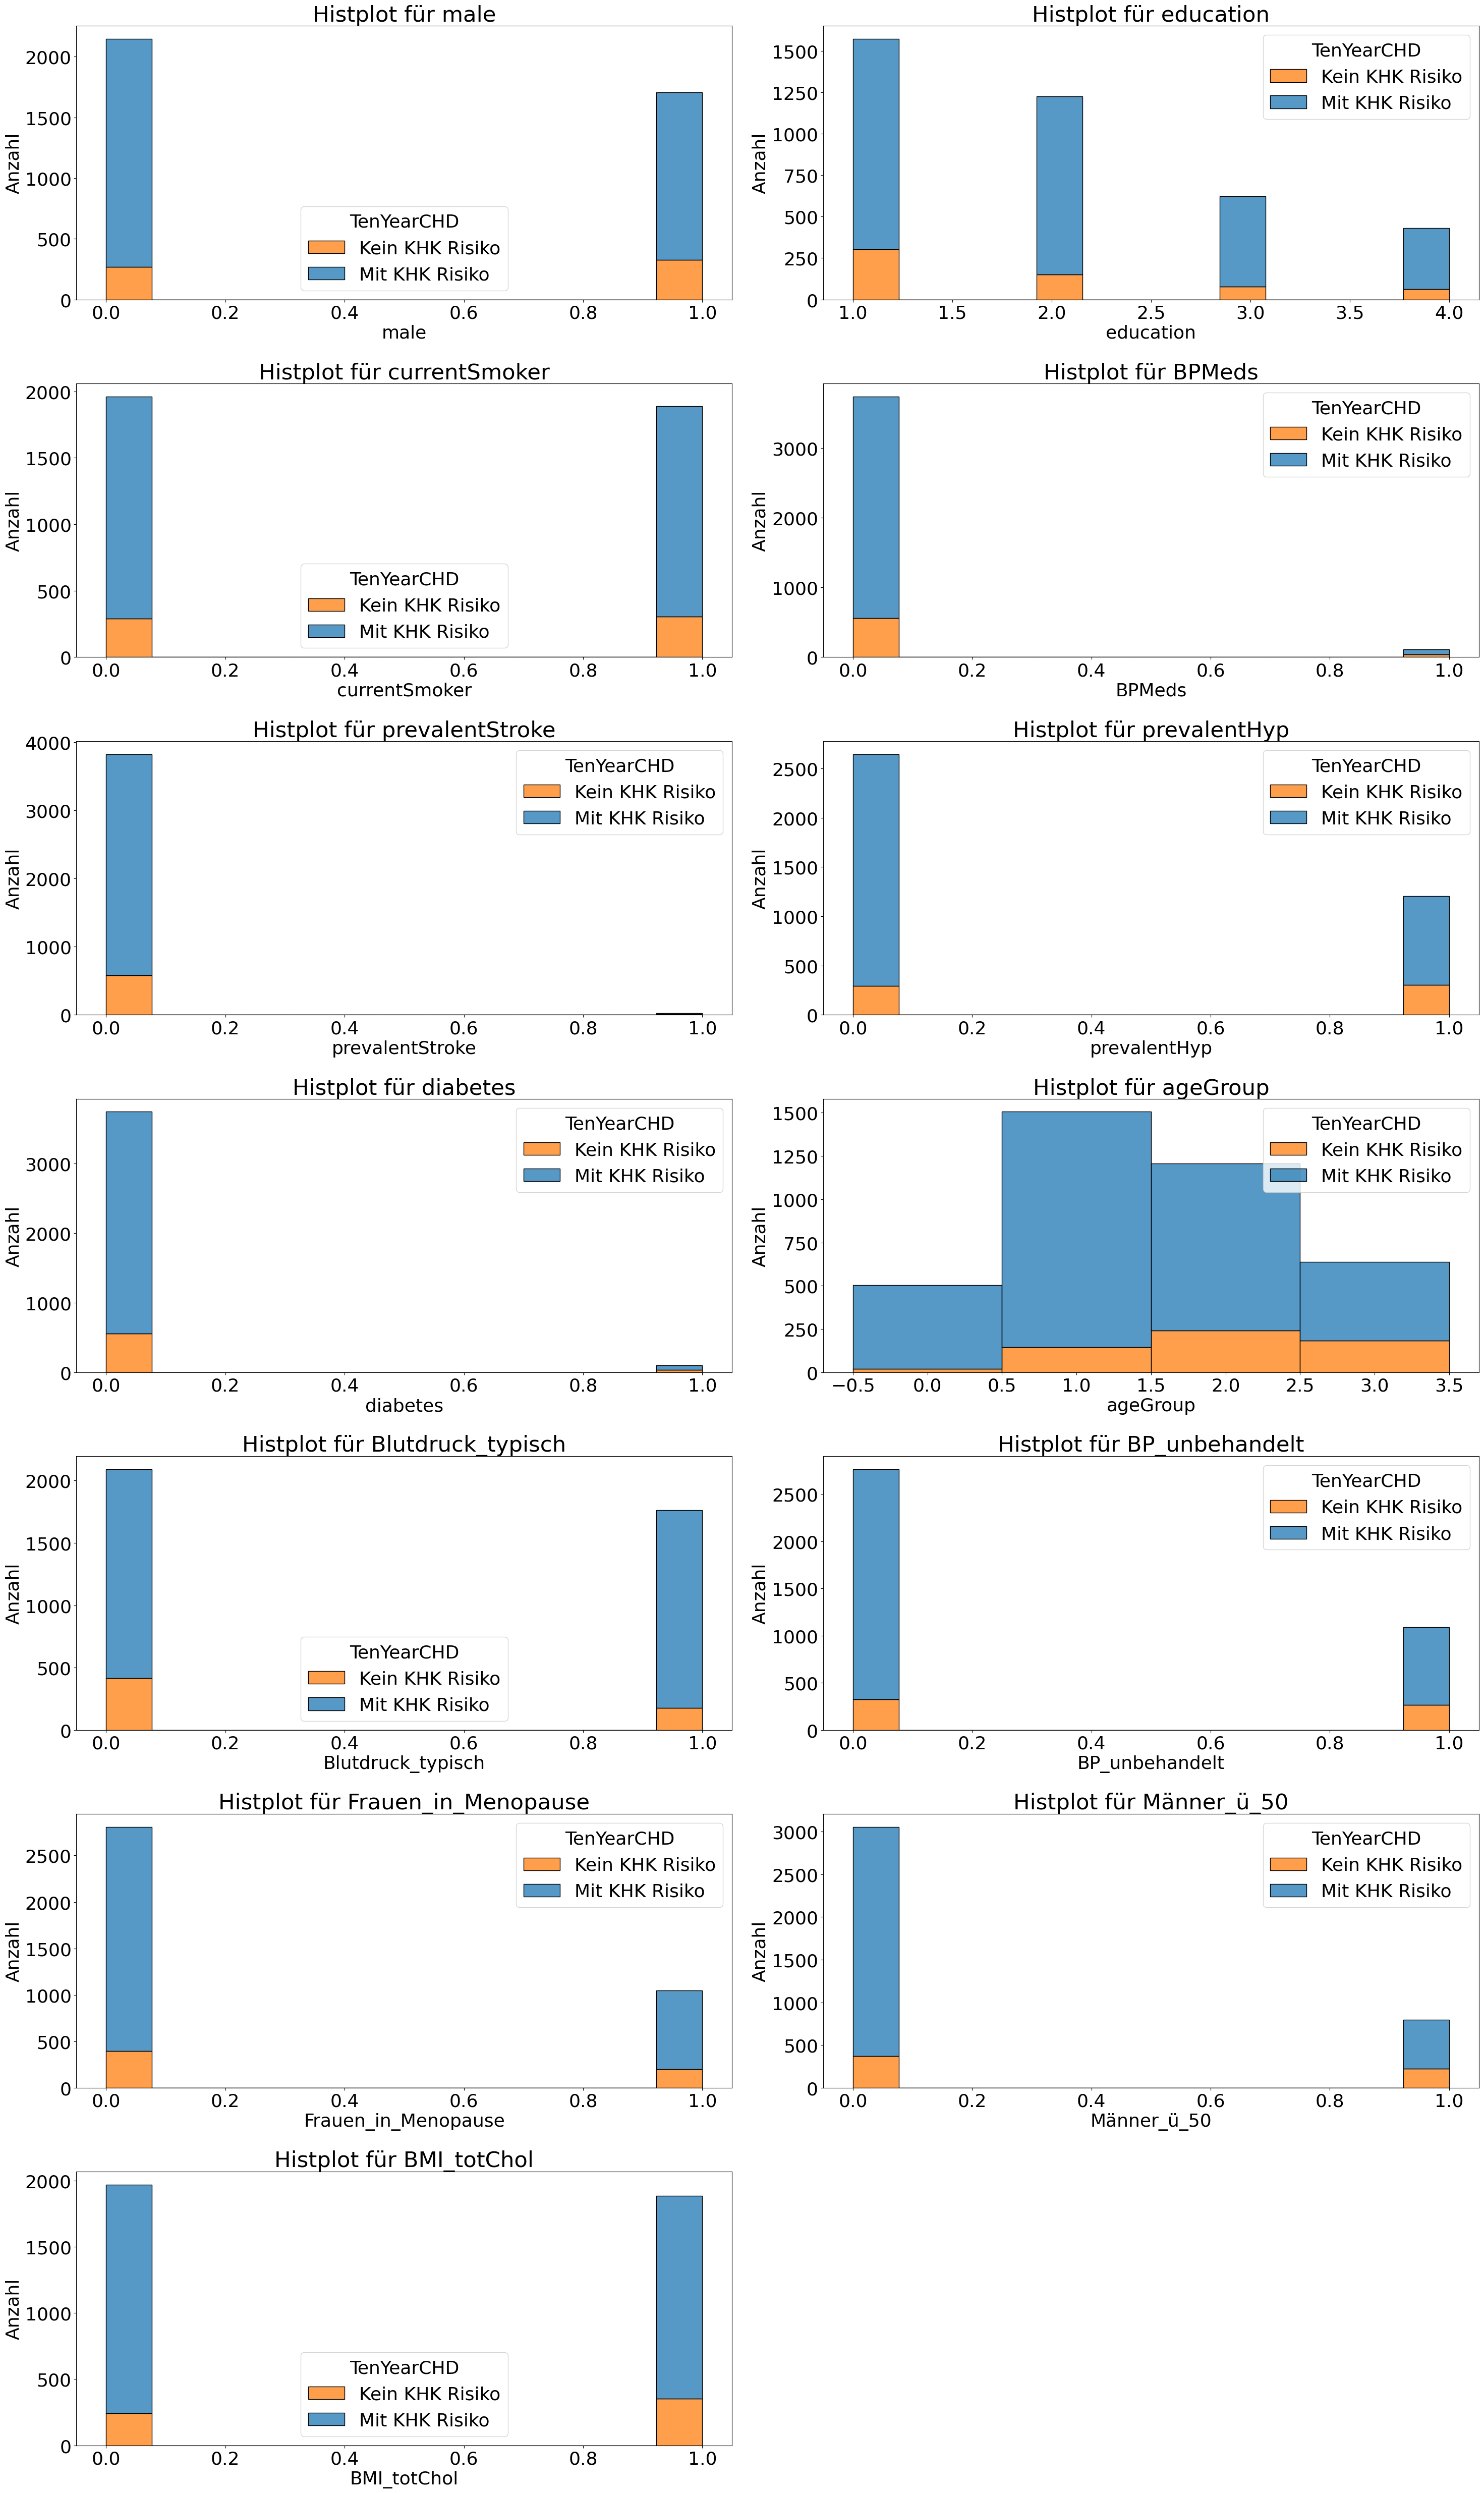

In [374]:
# Anzahl der Zeilen und Spalten für die Subplots festlegen
rows = (len(kat_Merkmalen) + 1) // 2
cols = 2

# Größe des gesamten Plots festlegen
plt.figure(figsize=(30,50))

# Iteration durch jedes kategoriale Merkmal
for i, merkmal in enumerate(kat_Merkmalen, 1):
    # Subplot erstellen
    plt.subplot(rows, cols, i)
    
    # Histplot erstellen
    sns.histplot(data=df3, x=merkmal, hue='TenYearCHD', multiple='stack', kde=False)
    
    # Beschriftungen und Titel hinzufügen
    plt.title(f'Histplot für {merkmal}')
    plt.xlabel(merkmal)
    plt.ylabel('Anzahl')
    plt.legend(title='TenYearCHD', labels=['Kein KHK Risiko', 'Mit KHK Risiko'])

# Layout anpassen
plt.tight_layout()

# Plot anzeigen
plt.show()


Der Code ermöglicht eine effektive Visualisierung der Verteilung der kategorialen Merkmale in Bezug auf das KHK-Risiko und ermöglicht es, Muster oder Zusammenhänge in den Daten zu identifizieren.
Hier erkennt man die Merkmalen, in dennen die datensätze ungleichmäig verteilt sind wie: Geschlechtsmekmal, Altersguppee, Diabetikern und Menschen mit existierendem Schlaganfall.

Da die bisherigen Informationen aus den Histogrammen nicht ausreichen, um den prozentualen Anteil jeder Kategorie in Bezug auf das KHK-Risiko zu verstehen, habe ich einen zusätzlichen Code erstellt. Dieser neue Code verwendet ein gestapeltes Balkendiagramm, um den prozentualen Anteil jeder Kategorie für jedes kategoriale Merkmal in Bezug auf das KHK-Risiko darzustellen.



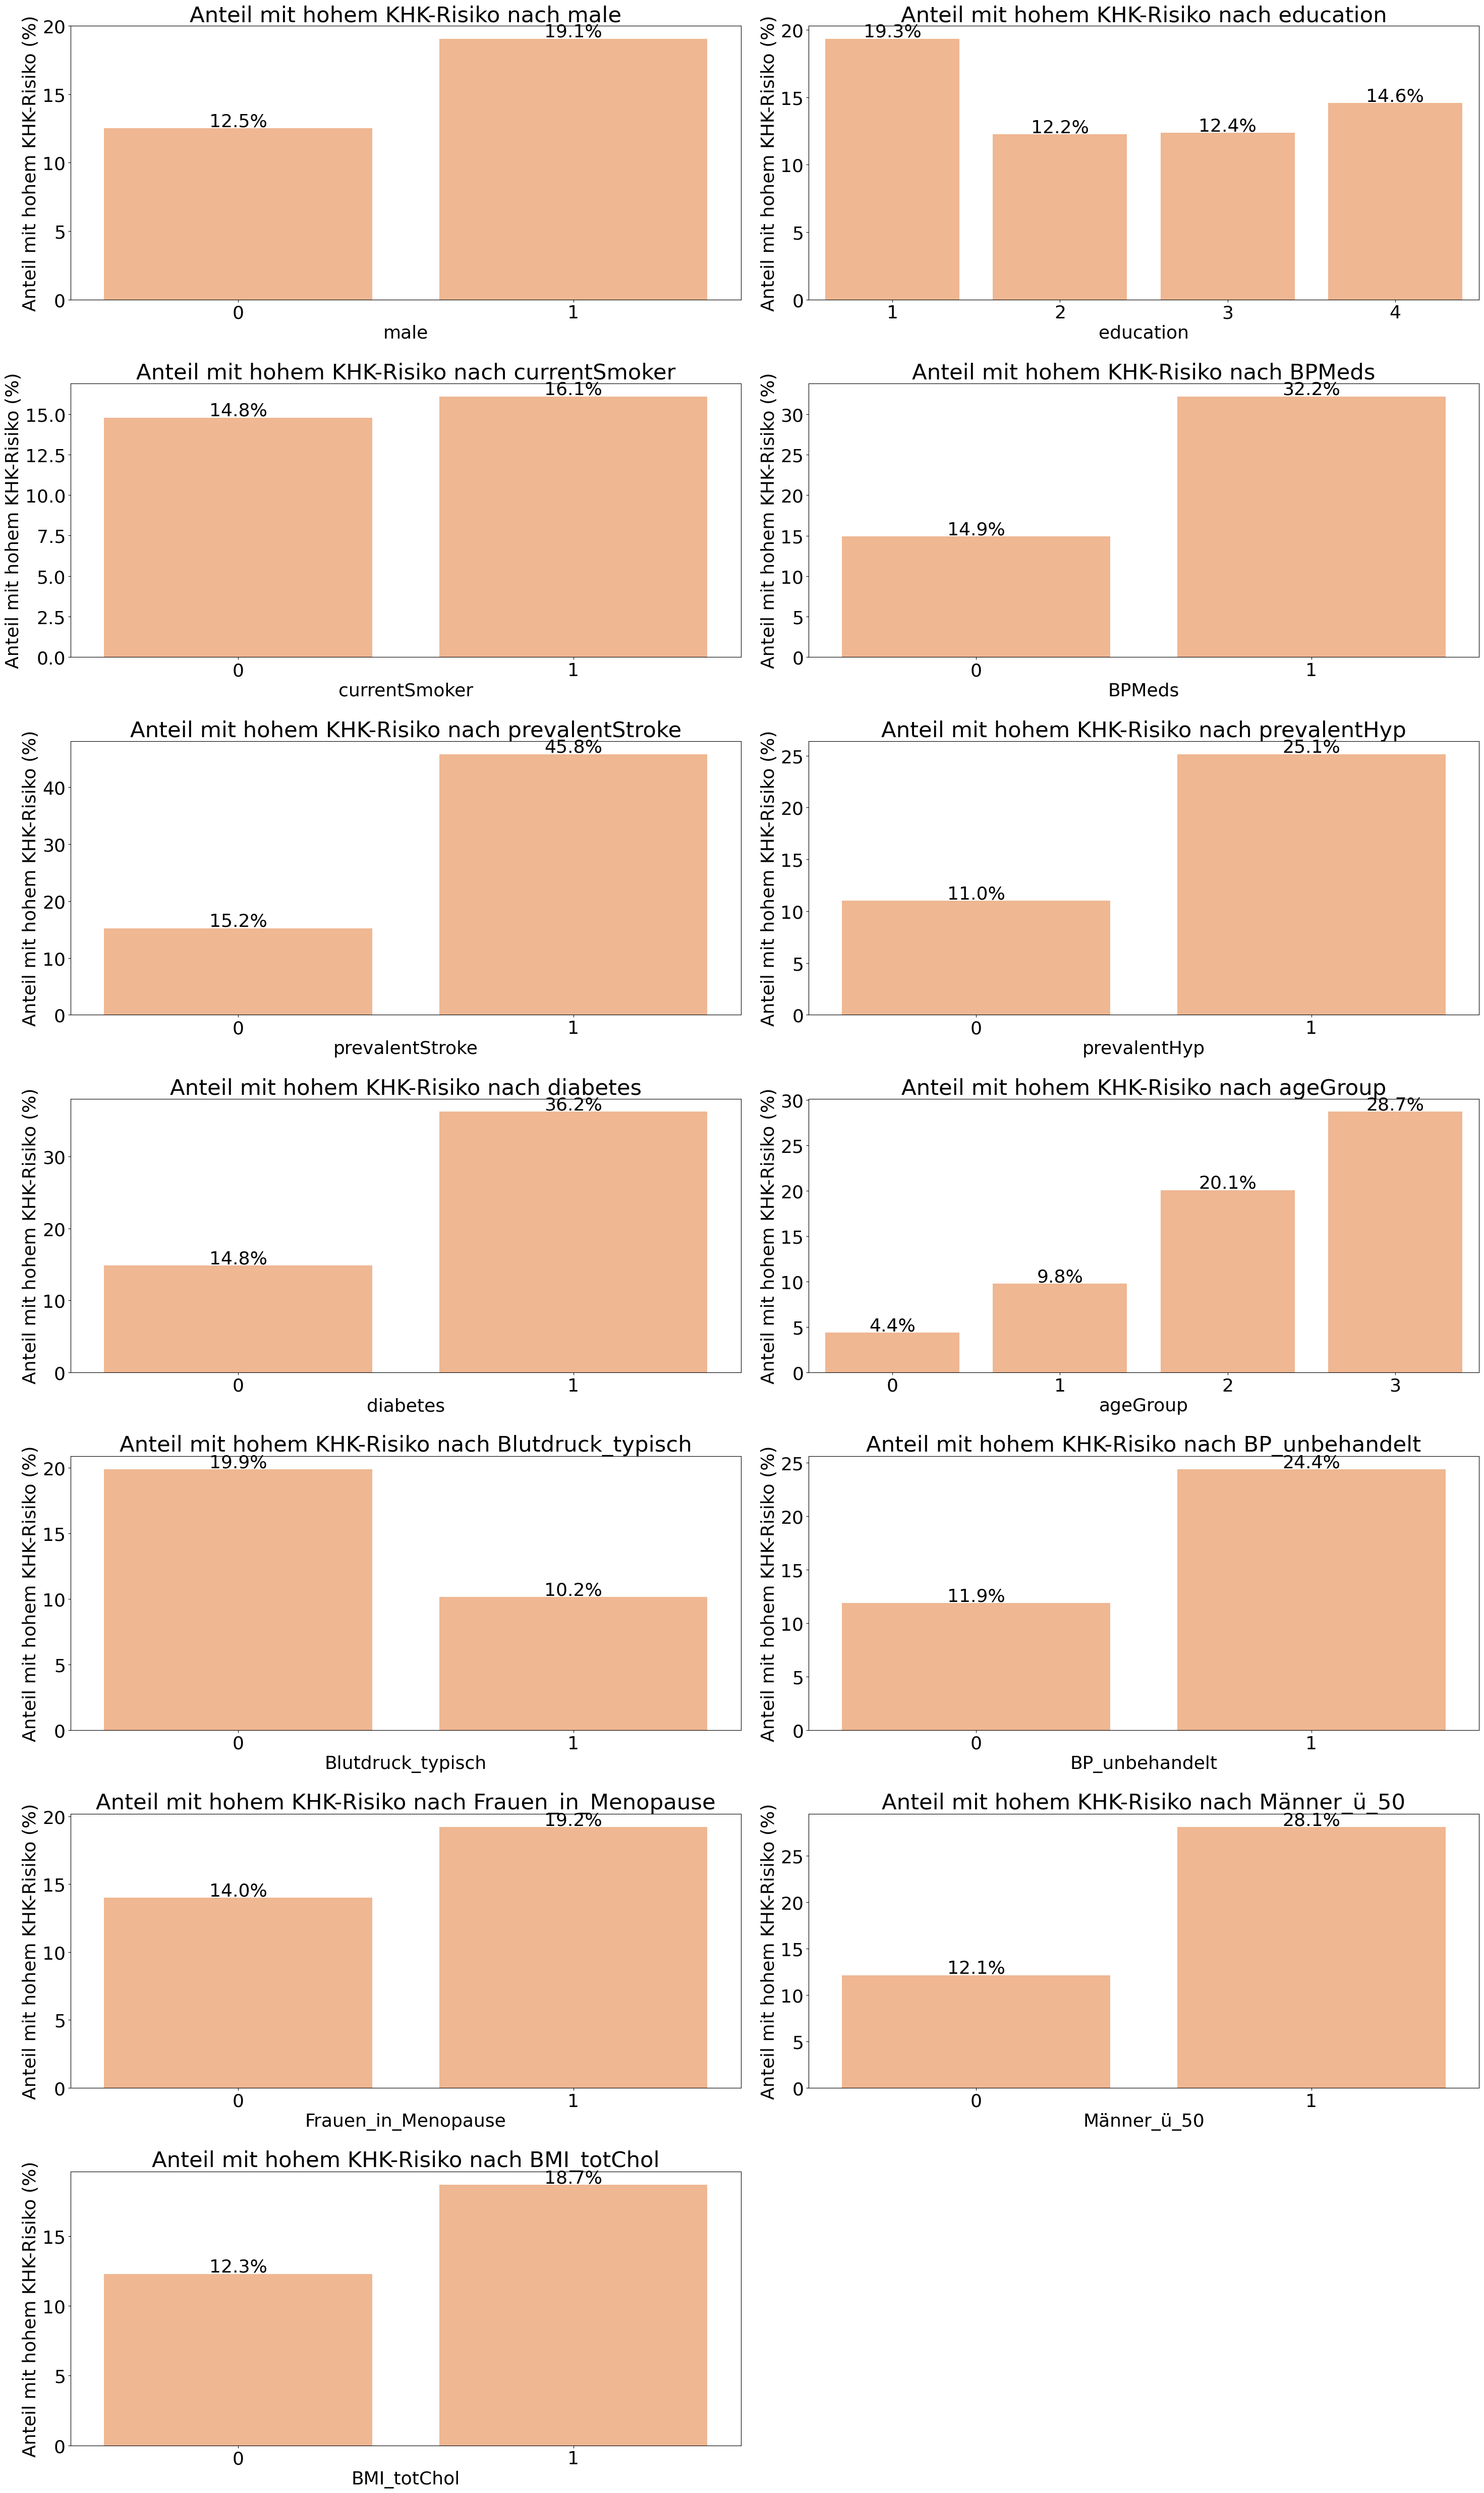

In [373]:

# Größe des gesamten Plots festlegen
plt.figure(figsize=(30, 50))

# Iteration durch jedes kategoriale Merkmal
for i, merkmal in enumerate(kat_Merkmalen, 1):
    # Subplot erstellen
    plt.subplot(rows, cols, i)
    
    # Daten für gestapeltes Bar Chart vorbereiten
    cross_tab = pd.crosstab(df3[merkmal], df3['TenYearCHD'], normalize='index') * 100
    cross_tab_high_risk = cross_tab[1]  # Anteil für KHK-Risiko (1)

    # Plot erstellen
    ax = sns.barplot(x=cross_tab_high_risk.index, y=cross_tab_high_risk.values, color=sns.color_palette('pastel')[1])

    # Beschriftungen und Titel hinzufügen
    plt.xlabel(merkmal)
    plt.ylabel('Anteil mit hohem KHK-Risiko (%)')
    plt.title(f'Anteil mit hohem KHK-Risiko nach {merkmal}')
    
    # Prozentsätze annotieren
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Layout anpassen
    plt.tight_layout()

# Plot anzeigen
plt.show()


hier kann man deutliche sehen, wie er die prozentualen Anteile für jede Kategorie visualisiert und die Anmerkungen für eine leichtere Interpretation hinzufügt. 

Diese Visualisierung ermöglicht es uns, Unterschiede im KHK-Risiko zwischen kategoriale Merkmalen zu identifizieren.
 


### Visualisieerungsbeericht:


* Zielvariable:
Ein wichtiger Aspekt, den wir bei der Analyse berücksichtigen müssen, ist die Verteilung unserer Zielvariable, nämlich die Koronare Herzkrankheit (KHK). Ein Blick auf das Countplot zeigt, dass wir eine signifikante Unausgewogenheit in unseren Daten haben. Die Anzahl der Menschen ohne KHK-Erkrankung beträgt 3250, während die Anzahl der Menschen mit KHK-Risiko nur 500 beträgt. Dies bedeutet, dass unsere Daten unausgewogen sind, und es ist wichtig, dies bei der Modellierung zu berücksichtigen. Modelle könnten aufgrund dieser Unausgewogenheit dazu neigen, sich auf die häufigere Klasse zu konzentrieren und die seltenere Klasse möglicherweise vernachlässigen. In solchen Fällen müssen wir möglicherweise geeignete Maßnahmen ergreifen, um die Unausgewogenheit auszugleichen.

* numerischen Variablen:
Bei der Betrachtung der Histogramme unserer Merkmale fällt auf, dass der **Zigarettenkonsum pro Tag und die Herzfrequenz** eine stark **ungleichmäßige Verteilung** aufweisen. Dies könnte darauf hindeuten, dass es unter den Teilnehmern Gruppen gibt, die unterschiedliche Rauchgewohnheiten haben oder dass es spezifische Gründe für unterschiedliche Herzfrequenzen gibt.

Im Gegensatz dazu zeigen die Variablen **Glukose, BMI, diaBP, sysBP und Gesamtcholesterin eine gleichmäßigere Verteilung**, die einer Normalverteilung ähnelt. Eine solche Verteilung ist in der statistischen Analyse oft vorteilhaft, da Modelle oft besser auf normal verteilte Daten reagieren. Dies könnte bedeuten, dass diese Variablen möglicherweise besser für bestimmte statistische Analysen oder Modellierungszwecke geeignet sind

* Boxplots
Ein genauerer Blick auf die Boxplots unserer Merkmale offenbart interessante Einblicke. In den Spalten Gesamtcholesterin, sysBP, Glukose und der Differenz zwischen systolischem und diastolischem Blutdruck (BPDifferenz) scheinen viele Ausreißer vorhanden zu sein.

Die Ausreißer in diesen Merkmalen könnten auf abnormale Werte hinweisen, die möglicherweise das Gesamtbild beeinflussen. 

* Kategorialen Merkmalen:

     * Zusammenfassend zeigt der Barplot, dass:
     
  **- Männer im vorliegenden Datensatz einen höheren prozentualen Anteil an Personen mit hohem KHK-Risiko aufweisen im Vergleich zu Frauen. Gründe dafür:**
     
         Biologische Unterschiede: Männer und Frauen haben unterschiedliche Hormonprofile, was sich auf den Stoffwechsel und das HerzKreislauf-System auswirken kann.
        Östrogene, die bei Frauen vorherrschen, können schützende Wirkungen auf die Gefäße haben.
        
        Genetik:Genetische Faktoren können eine Rolle spielen und das KHK-Risiko beeinflussen.
        Es gibt genetische Unterschiede, die die Empfänglichkeit für bestimmte Risikofaktoren beeinflussen können.
        
        Lebensstilfaktoren:Unterschiede im Lebensstil, wie Ernährungsgewohnheiten, Rauchverhalten, körperliche Aktivität und Stressbewältigung, können geschlechtsspezifische Unterschiede im KHK-Risiko erklären.
        
        Medizinische Versorgung und Prävention: Geschlechtsspezifische Unterschiede in der medizinischen Versorgung und Prävention können eine Rolle spielen.
        Frauen und Männer könnten unterschiedlichen Zugang zu Gesundheitsversorgung haben, was Auswirkungen auf die Diagnose, Behandlung und Prävention von Herzkrankheiten haben kann.
        
        Sozioökonomische Faktoren, Gesundheitsbewusstsein.....
     
 
  **- Unterschiede im Bildungsniveau, Einkommen und Arbeitsbedingungen könnten zu unterschiedlichen Lebensstilen führen.**
     
  **- Personen mit einem vorher existierenden Schlaganfall haben ein erheblich höheres KHK-Risiko im Vergleich zu Personen ohne vorher existierten Schlaganfall.**
     
  **- ähnliche Ergebnisse für verschiedene Gruppen, wie Diabetiker, Männer über 50, Menschen mit hohem BMI und Cholesterinspiegel sowie Menschen mit hohem Blutdruck.**
     
  **- Der Barplot zeigt keine signifikanten Unterschiede im KHK-Risiko zwischen Rauchern und Nichtrauchern.**
     
     
     

### 2.3.3 Hypothesen testen und Datenvisualisierung


#### 2.3.3.1 Hypothese 1- Alter

Hier möchte ich den Zusammenhang zwischen Alter und dem Risiko für koronare Herzkrankheit (KHK) überprüfen.

Die Hypothesen lauten:

**Nullhypothese (H0):** Es besteht kein signifikanter Zusammenhang zwischen Alter und dem Risiko für KHK.

**Alternativhypothese (H1):** Es besteht ein signifikanter Zusammenhang zwischen Alter und dem Risiko für KHK.

In statistischer Form ausgedrückt:

H0: β1 (der Regressionskoeffizient für das Alter) ist gleich null.
H1: β1 ist ungleich null.


#### Statistische Auswertung
Statistische Auswertung wird mit einer **linearen Regression** durchgeführt.

In [375]:
# mit einer linearen Regression
#Bibliothek statsmodels importieren
import statsmodels.api as sm

# Daten vorbereiten (X ist die unabhängige Variable Alter, y ist die abhängige Variable KHK-Risiko)
X = df3['age']
y = df3['TenYearCHD']

# Konstante zu X hinzufügen
X = sm.add_constant(X)

# Logistische Regression durchführen
model = sm.Logit(y, X).fit()

# Ergebnisse anzeigen
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.402142
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3852
Model:                          Logit   Df Residuals:                     3850
Method:                           MLE   Df Model:                            1
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                 0.06465
Time:                        10:41:03   Log-Likelihood:                -1549.0
converged:                       True   LL-Null:                       -1656.1
Covariance Type:            nonrobust   LLR p-value:                 1.732e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7081      0.298    -19.128      0.000      -6.293      -5.123
age            0.0777      0.

In diesem Abschnitt habe ich  eine logistische Regression durchgeführt, um die Beziehung zwischen dem Alter (unabhängige Variable) und dem KHK-Risiko (abhängige Variable) zu analysieren.
Die logistische Regression wurde unter Verwendung der Methode der maximalen Likelihood-Schätzung (MLE) durchgeführt.
die Ergebnisse deuten darauf hin, dass das Alter einen signifikanten Einfluss auf das KHK-Risiko hat.
Der Koeffizient für das Alter (0.0777) zeigt an, dass mit jedem zusätzlichen Jahrzehnt das KHK-Risiko um diesen Betrag steigt.

**Insgesamt zeigen diese Ergebnisse, dass das Alter einen signifikanten Einfluss auf das KHK-Risiko hat, 
basierend auf dem p-Wert (000) für den Koeffizienten age.**

#### Visualisierung

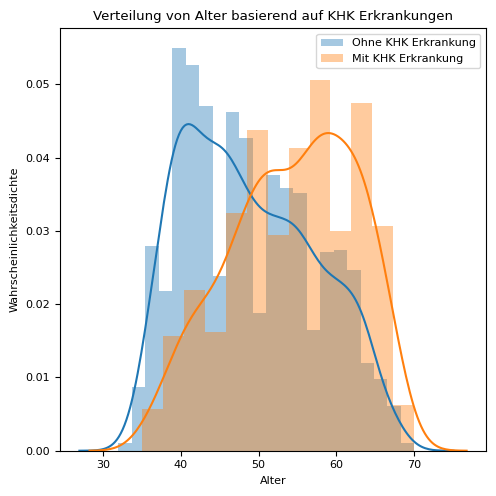

In [377]:
plt.figure(figsize=(5,5))
sns.distplot(df3[df3['TenYearCHD'] == 0]['age'], label='Ohne KHK Erkrankung')
sns.distplot(df3[df3['TenYearCHD'] == 1]['age'], label='Mit KHK Erkrankung')

plt.title('Verteilung von Alter basierend auf KHK Erkrankungen')
plt.xlabel('Alter')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.legend()
# Schriftgröße Ändern
plt.rc('font', size=8) 

# Layout anpassen und Plot anzeigen
plt.tight_layout()

# Plot anzeigen
plt.show()

Nach der Betrachtung von das Diagramm konnte festgestellt werden, dass das Risiko für koronare Herzkrankheit mit dem Alter signifikant ansteigt.

#### 2.3.3.2 Hypothese 2:  Männer neigen dazu, in jüngeren Jahren ein höheres Risiko zu haben im Vergleich zu Frauen


**Nullhypothese (H0):** Männer haben in jüngeren Jahren kein höheres Risiko für Herz-Kreislauf-Erkrankungen im Vergleich zu Frauen.

**Alternative Hypothese (H1):** Männer haben in jüngeren Jahren ein höheres Risiko für Herz-Kreislauf-Erkrankungen im Vergleich zu Frauen.

Diese Hypothesen basieren auf der Annahme, dass es keinen geschlechtsspezifischen Unterschied im Herz-Kreislauf-Risiko in jüngeren Jahren gibt (Nullhypothese), während die alternative Hypothese darauf hinweist, dass Männer in jüngeren Jahren ein höheres Risiko haben könnten.

#### Statistische Auswertung

**Chi-Quadrat-Test** eine mögliche Methode, um den Zusammenhang zwischen Geschlecht und KHK-Risiko zu überprüfen.

Der Chi-Quadrat-Wert, den wir bekommen haben (Chi-Quadrat-Wert: {chi2}), zeigt, wie unterschiedlich die Anzahlen von Männern und Frauen mit Herzkrankheiten sind im Vergleich zu dem, was wir erwartet hätten. Wenn der Wert hoch ist, bedeutet das, dass es einen starken Zusammenhang zwischen Geschlecht und Herzkrankheiten gibt.


In [386]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df3['male'], df3['TenYearCHD'])

# Durchführung des Chi-Quadrat-Tests
chi2, p, _, _ = chi2_contingency(contingency_table)

# Ausgabe der Testergebnisse
print(f"Chi-Quadrat-Wert: {chi2}")
print(f"P-Wert: {p}")

Chi-Quadrat-Wert: 30.59400563650962
P-Wert: 3.1807494852896646e-08


Der berechnete Chi-Quadrat-Wert beträgt 30.59, was darauf hinweist, dass es eine signifikante Abweichung zwischen den beobachteten und erwarteten Häufigkeiten von Geschlecht (male) und KHK-Risiko (TenYearCHD) gibt.

P-Wert:
Der P-Wert ist mit 3.18e-08 sehr niedrig, nahe Null. Dies bedeutet, dass die Wahrscheinlichkeit extrem gering ist, dass die beobachteten Unterschiede rein zufällig sind. Daher deutet der niedrige P-Wert auf eine statistisch signifikante Assoziation zwischen Geschlecht und KHK-Risiko hin.

Diese Ergebnisse legen nahe, dass es Unterschiede im KHK-Risiko zwischen den Geschlechtern gibt. Die Assoziation zwischen männlichem Geschlecht und einem erhöhten Risiko für koronare Herzkrankheiten ist statistisch bedeutsam.

Die Identifizierung von geschlechtsspezifischen Unterschieden im KHK-Risiko kann für die Entwicklung geschlechtsbezogener Präventionsstrategien und Interventionen von Bedeutung sein.


**Der Chi-Quadrat-Wert von 30.59 und der sehr niedrige P-Wert von 3.18e-08 deuten darauf hin, dass es einen statistisch signifikanten Zusammenhang zwischen Geschlecht (männlich) und dem Risiko für koronare Herzkrankheit (KHK) gibt.**

#### Visualisierung

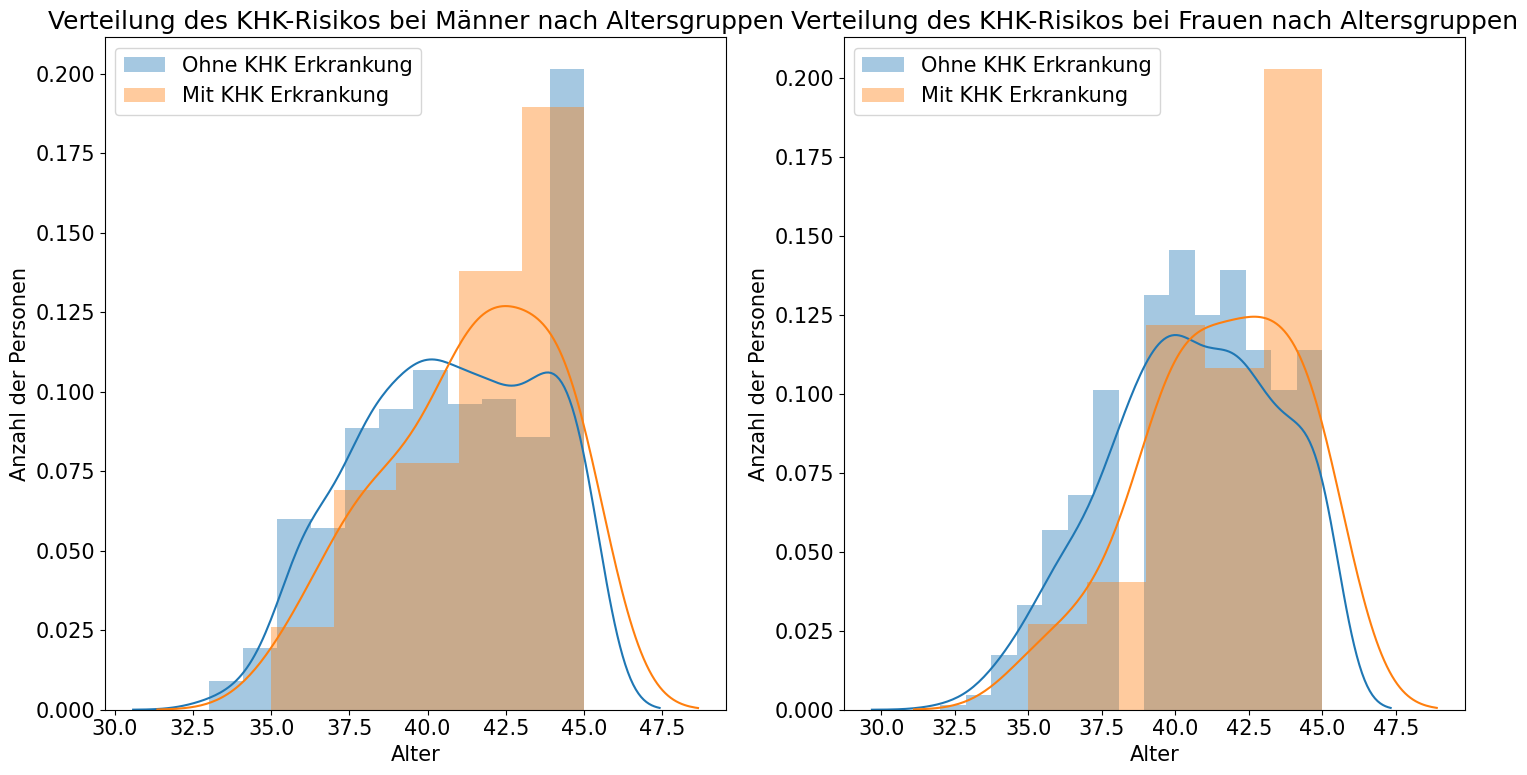

In [389]:
# Daten für Männer (Alter <= 45)
male_data = df3[(df3['male'] == 1) & (df3['age'] <= 45)]
# Daten für Frauen (Alter <= 45)
female_data = df3[(df3['male'] == 0) & (df3['age'] <= 45)]


# Subplots erstellen
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Diagramm für Männer
sns.distplot(male_data[male_data['TenYearCHD'] == 0]['age'], label='Ohne KHK Erkrankung', ax=axs[0])
sns.distplot(male_data[male_data['TenYearCHD'] == 1]['age'], label='Mit KHK Erkrankung', ax=axs[0])

axs[0].set_title('Verteilung des KHK-Risikos bei Männer nach Altersgruppen')
axs[0].set_xlabel('Alter')
axs[0].set_ylabel('Anzahl der Personen')
axs[0].legend()
# Schriftgröße Ändern
plt.rc('font', size=15) 

# Diagramm für Frauen
sns.distplot(female_data[female_data['TenYearCHD'] == 0]['age'], label='Ohne KHK Erkrankung', ax=axs[1])
sns.distplot(female_data[female_data['TenYearCHD'] == 1]['age'], label='Mit KHK Erkrankung', ax=axs[1])
axs[1].set_title('Verteilung des KHK-Risikos bei Frauen nach Altersgruppen')
axs[1].set_xlabel('Alter')
axs[1].set_ylabel('Anzahl der Personen')
axs[1].legend()
# Schriftgröße Ändern
plt.rc('font', size=15) 
# Layout anpassen
plt.tight_layout()

# Diagramme anzeigen
plt.show()

#### 2.3.3.3 Hypothese 3 :Ist das Risiko für Frauen nach den Wechseljahren genauso hoch wie das für Männer im gleichen Alter?


**Nullhypothese (H0):** Das KHK-Risiko für Frauen nach den Wechseljahren ist gleich hoch wie das für Männer im gleichen alter.

**Alternativhypothese (H1):** Das KHK-Risiko für Frauen nach den Wechseljahren unterscheidet sich von dem für Männer im gleichen alter.


#### Statistische Auswertung

In [390]:
from scipy.stats import ttest_ind

# Daten filtern für Männer nach 50 und Frauen
männer_ü_50 = df3[df3['Männer_ü_50'] == 1]['TenYearCHD']
frauen_nach_50 = df3[df3['Frauen_in_Menopause'] == 1]['TenYearCHD']

# T-Test durchführen
t_statistic, p_value = ttest_ind(männer_ü_50, frauen_nach_50, equal_var=False)

# Ergebnisse ausgeben
print(f'T-Statistik: {t_statistic}')
print(f'P-Wert: {p_value}')

# Interpretation
if p_value < 0.05:
    print('Der Unterschied ist statistisch signifikant. Die Nullhypothese wird abgelehnt.')
else:
    print('Es gibt keine ausreichenden Beweise, um die Nullhypothese abzulehnen.')


T-Statistik: 4.4166597885487455
P-Wert: 1.0700939215034682e-05
Der Unterschied ist statistisch signifikant. Die Nullhypothese wird abgelehnt.


Aufgrund der Ergebnisse des t-Tests gibt es statistisch signifikante Hinweise darauf,
dass das KHK-Risiko für Männer nach 50 Jahren im Vergleich zu Frauen unterschiedlich ist.

#### Visualisierung

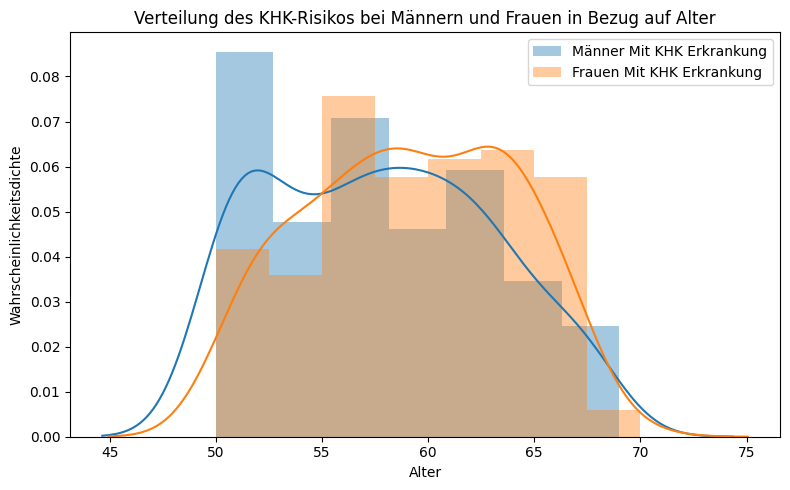

In [394]:
plt.figure(figsize=(8,5))
# Daten für Männer (Alter ü 50)
male_data1 = df3[(df3['male'] == 1) & (df3['age']>=50)]
# Daten für Frauen (Alter ü50)
female_data1 = df3[(df3['male'] == 0) & (df3['age']>=50)]


sns.distplot(male_data1[male_data1['TenYearCHD'] == 1]['age'], label='Männer Mit KHK Erkrankung')
sns.distplot(female_data1[female_data1['TenYearCHD'] == 1]['age'], label='Frauen Mit KHK Erkrankung')
plt.title('Verteilung des KHK-Risikos bei Männern und Frauen in Bezug auf Alter')
plt.xlabel('Alter')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.legend()
plt.rc('font', size=10) 
# Layout anpassen
plt.tight_layout()

# Diagramme anzeigen
plt.show()

**Der Plot verdeutlicht, dass das Risiko für Frauen ab 50 Jahren deutlich ansteigt und ab 60 Jahren sogar das Risiko für Männer übertrifft.** 

**Es ist jedoch zu beachten, dass das Risiko für Männer bei 50 Jahren signifikant höher ist. Insgesamt bleibt trotz des späteren Überholens bei Frauen das aggregierte Risiko ab 50 Jahren höher für Männer, wie im Plot ersichtlich.**

#### 2.3.3.4 Hypothese 4 :

Um die Situation zwischen Patienten mit unbehandeltem Bluthochdruck und Patienten mit behandeltem Bluthochdruck hinsichtlich des KHK-Risikos zu vergleichen, können Sie eine Analyse durchführen.

**Nullhypothese (H0):** Es gibt keinen signifikanten Unterschied im KHK-Risiko zwischen Patienten mit unbehandeltem Bluthochdruck und Patienten mit behandeltem Bluthochdruck.

**AlternativeHypothese**: Es gibt einen signifikanten Unterschied im KHK-Risiko zwischen Patienten mit unbehandeltem Bluthochdruck und Patienten mit behandeltem Bluthochdruck.


#### Statistische Auswertung

In [395]:
#Filtern den Datensatz
# Unbehandelter Bluthochdruck
untreated_hbp_data = df3[df3['BP_unbehandelt'] == 1]

# Behandelter Bluthochdruck
treated_hbp_data = df3[df3['BPMeds'] == 1]



In [55]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(untreated_hbp_data['TenYearCHD'], treated_hbp_data['TenYearCHD'])
print(f'T-Statistik: {t_stat}\nP-Wert: {p_value}')

T-Statistik: -1.8335716230447838
P-Wert: 0.06696434884211522


Der P-Wert von 0.067 liegt über dem typischen Signifikanzniveau von 0.05, was darauf hindeutet, dass wir **die Nullhypothese nicht ablehnen können.**

### Visualisierung

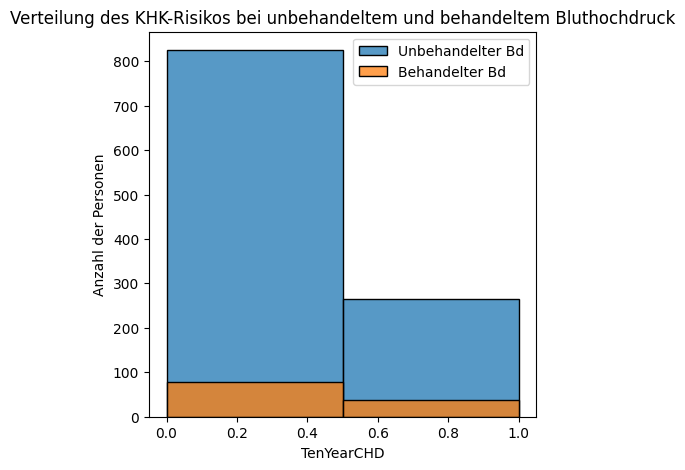

In [56]:

plt.figure(figsize=(5,5))

# Histogramm für unbehandelten Bluthochdruck
sns.histplot(untreated_hbp_data['TenYearCHD'], label='Unbehandelter Bd', bins=2, kde=False)

# Histogramm für behandelten Bluthochdruck
sns.histplot(treated_hbp_data['TenYearCHD'], label='Behandelter Bd', bins=2, kde=False)

plt.title('Verteilung des KHK-Risikos bei unbehandeltem und behandeltem Bluthochdruck')
plt.xlabel('TenYearCHD')
plt.ylabel('Anzahl der Personen')
plt.legend()
plt.show()

#### Hypothese 5: Einfluss der Blutdruckdifferenz auf das KHK-Risiko im Vergleich zu einzelnen Blutdruckwerten:
 
Hierbei wird eine Regression durchgeführt, bei der alle drei Variablen (systolischer Blutdruck, diastolischer Blutdruck und Blutdruckdifferenz) als unabhängige Variablen betrachtet werden.

Statistische Auswertung wird mit einer **linearen Regression** durchgeführt.


**Nullhypothese (H0):** Die Blutdruckdifferenz hat keinen signifikanten Einfluss auf das KHK-Risiko im Vergleich zu systolischem und diastolischem Blutdruck.

**Alternativhypothese (H1):** Die Blutdruckdifferenz hat einen signifikanten Einfluss auf das KHK-Risiko im Vergleich zu systolischem und diastolischem Blutdruck.

In [407]:
# Daten vorbereiten
X = df3[['BPDifference', 'diaBP', 'sysBP']]
y = df3['TenYearCHD']

# Konstante hinzufügen
X = sm.add_constant(X)

# Logistisches Regressionsmodell erstellen
logit_model = sm.Logit(y, X)

# Modell anpassen
result = logit_model.fit()

# Ergebnisse anzeigen
print(result.summary())


         Current function value: 0.407061
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3852
Model:                          Logit   Df Residuals:                     3848
Method:                           MLE   Df Model:                            3
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                 0.05320
Time:                        12:11:08   Log-Likelihood:                -1568.0
converged:                      False   LL-Null:                       -1656.1
Covariance Type:            nonrobust   LLR p-value:                 5.772e-38
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.6784      0.312    -14.993      0.000      -5.290      -4.067
BPDifference     0.0141        nan        nan        nan   

Die Ergebnisse der logistischen Regression zeigen, dass die Variable 'BPDifference' einen positiven Einfluss auf das KHK-Risiko hat. 
                
In diesem Fall ist der Koeffizient für 'BPDifference' positiv (0.0140), was darauf hinweist, dass eine Zunahme der Blutdruckdifferenz mit einer Zunahme des KHK-Risikos verbunden ist. Die anderen beiden Koeffizienten für 'sysBP' und 'diaBP' sind ebenfalls positiv, was darauf hindeutet, dass höhere systolische und diastolische Blutdruckwerte ebenfalls mit einem höheren KHK-Risiko verbunden sind.

Es ist ungewöhnlich, dass die Standardfehler und P-Werte als nan (Not a Number) angezeigt werden. Dies kann darauf hinweisen, dass es möglicherweise Probleme mit den Daten gibt d.h. (ungewöhnliche Werte) in den Variablen sysBP, diaBP oder BPDifference.

**Deswegen möchte ich Korrelationsanalysen durchführen, um die Stärke und Richtung der linearen Beziehungen zwischen den Variablen zu untersuchen.**

In [412]:
#Daten vorbereiten
correlation_data = df3[['BPDifference', 'diaBP', 'sysBP', 'TenYearCHD']]

# Pearson-Korrelationskoeffizienten berechnen
correlation_matrix = correlation_data.corr()

# Ergebnisse anzeigen
print(correlation_matrix)

              BPDifference     diaBP     sysBP  TenYearCHD
BPDifference      1.000000  0.365491  0.864013    0.214829
diaBP             0.365491  1.000000  0.784426    0.146231
sysBP             0.864013  0.784426  1.000000    0.222241
TenYearCHD        0.214829  0.146231  0.222241    1.000000



BPDifference und diaBP: Der Korrelationskoeffizient beträgt 0.36. Dies deutet auf eine **moderate positive lineare Korrelation** zwischen der Blutdruckdifferenz und dem diastolischen Blutdruck hin.

BPDifference und sysBP: Der Korrelationskoeffizient beträgt 0.86. Dies deutet auf eine **starke positive lineare Korrelation** zwischen der Blutdruckdifferenz und dem systolischen Blutdruck hin.

diaBP und sysBP: Der Korrelationskoeffizient beträgt 0.784426. Dies deutet auf eine **starke positive lineare Korrelation** zwischen dem diastolischen und systolischen Blutdruck hin.

Alle anderen Koeffizienten mit TenYearCHD: Die Werte sind relativ niedrig. Der höchste ist 0.222241, was auf eine schwache positive lineare Korrelation zwischen den Blutdruckwerten und dem TenYearCHD (KHK-Risiko) hinweisen könnte. 
Es gibt eine starke positive lineare Korrelation zwischen der Blutdruckdifferenz und dem systolischen Blutdruck.
Es gibt moderate bis starke positive lineare Korrelationen zwischen der Blutdruckdifferenz, dem diastolischen Blutdruck und dem systolischen Blutdruck.
Die Korrelationen zwischen Blutdruckwerten und dem KHK-Risiko (TenYearCHD) sind schwach bis moderat.

### 2.3.4 Multivariate Analyse (corr, Heatmap)

Um die komplexen Beziehungen zwischen verschiedenen Variablen zu verstehen, habe ich eine Multivariate Analyse durchgeführt. 

In [418]:
corr=df3.corr()

Mit dem Python-Code corr=df3.corr() haben wir eine Korrelationsmatrix erstellt. Diese Matrix gibt uns Aufschluss über die Stärke und Richtung der linearen Beziehungen zwischen unseren untersuchten Variablen.


Die visuelle Darstellung dieser Korrelationsmatrix erfolgte durch die Erstellung einer Heatmap. 
Hierbei habe ich die sns.heatmap-Funktion verwendet, um Farben zu verwenden, die die Korrelationen leicht interpretierbar machen.

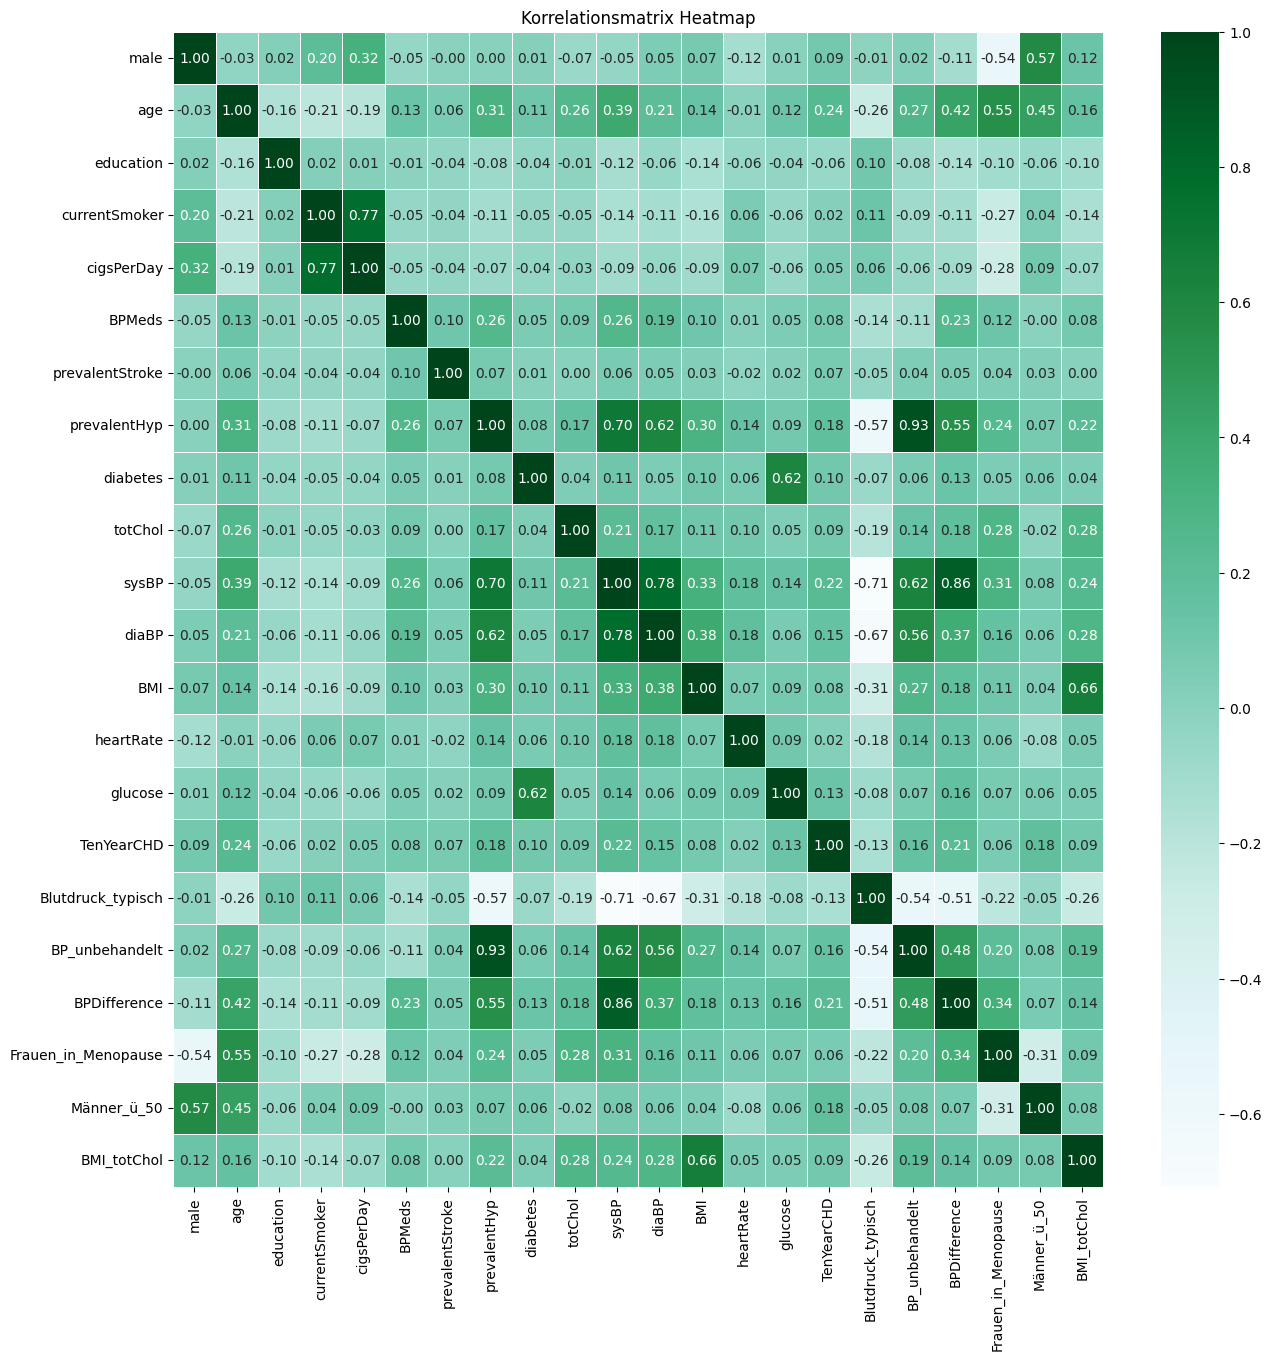

In [416]:
# Heatmap erstellen mit einer Matplotlib-Palette ('BuGn') erstellen
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='BuGn', fmt=".2f", linewidths=.5)
plt.title('Korrelationsmatrix Heatmap')
plt.show()

Im Korrelation Matrix zeigen die individuellen koeffizienten der Variablen  keine bedeutende Verbindung signifikante Korrelation. 

--> die Neigung zu Herzerkrankungen  ist das Resultat einer Vielzahl von Einflussfaktoren.

In [419]:
# Korrelationskoeffizienten nach dem absoluten Wert sortieren
correlation_mit_KHK = pd.DataFrame(corr['TenYearCHD'].drop('TenYearCHD')).abs().sort_values(by='TenYearCHD',ascending=False)

# Die stärkste Korrelation anzeigen
correlation_mit_KHK

TenYearCHD
age                    0.235376
sysBP                  0.222241
BPDifference           0.214829
prevalentHyp           0.181681
Männer_ü_50            0.179045
BP_unbehandelt         0.155970
diaBP                  0.146231
Blutdruck_typisch      0.133990
glucose                0.125590
diabetes               0.096273
totChol                0.091939
male                   0.089844
BMI_totChol            0.088405
BMI                    0.083147
BPMeds                 0.081378
prevalentStroke        0.066680
Frauen_in_Menopause    0.064167
education              0.062621
cigsPerDay             0.052403
heartRate              0.020879
currentSmoker          0.018048

Mit den folgenden 5 Variablen, korreliert die Zielvariable 'TenYearCHD' am stärksten:
   * Alter
   * sysBP
   * BPDifference
   * Prevalenthyp
   * Männer_ü_50
    
Mit den folgennden 5 Variablen, korreliert die Zielvariable 'TenYearCHD' am schwächsten:
   * currentSmoker
   * HeartRate
   * cigsPerDay
   * Education
   * Frauen_in_Menopause

# 3 Praktische Umsetzung: *machine learning* -Modellentwicklung

In [420]:
#Daten_Kopie erstellen
df4=df3.copy()
df4.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'ageGroup',
       'Blutdruck_typisch', 'BP_unbehandelt', 'BPDifference',
       'Frauen_in_Menopause', 'Männer_ü_50', 'BMI_totChol'],
      dtype='object')

### 3.1 Merkmalsauswahl 

hier werden die Merkmalen ausgewählt, die eine Korrelation von mehr als 0.066 (oder weniger als -0.066, um starke negative Korrelationen einzuschließen) mit der Zielvariable aufweisen. 

In [421]:
# Print der ausgewählten Features
ausgewählten_merkmalen=corr['TenYearCHD'][abs(corr['TenYearCHD']) > 0.066].index
print('Ausgewählte Merkmale basierend auf Korrelation:')
print(ausgewählten_merkmalen)

Ausgewählte Merkmale basierend auf Korrelation:
Index(['male', 'age', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose', 'TenYearCHD',
       'Blutdruck_typisch', 'BP_unbehandelt', 'BPDifference', 'Männer_ü_50',
       'BMI_totChol'],
      dtype='object')


## 3.2 Aufteilung der Daten in Trainings- und Testsets

In [422]:
print(ausgewählten_merkmalen)

Index(['male', 'age', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose', 'TenYearCHD',
       'Blutdruck_typisch', 'BP_unbehandelt', 'BPDifference', 'Männer_ü_50',
       'BMI_totChol'],
      dtype='object')


ich werde die Zielvariable y und die Features X aus deinem DataFrame df4 extrahieren 
und die Methode drop verwendet, um die 'TenYearCHD'-Spalte aus den Features zu entfernen.



In [423]:
ausgewählten_merkmalen
y = df4['TenYearCHD']
X = df4[ausgewählten_merkmalen].drop('TenYearCHD', axis=1)  

In [424]:
#Nach der Erstellung  Zielvariable y  Features X 
#sollen das DataFrame in Trainings- und Testsets aufteilen.                               
                              
                              
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3.1 Scaling

#### Standardisierung:

Standardisierung die Daten bedeuted, dass sie eine Mittelwert von 0 und eine Standardabweichung von 1 haben.


In [425]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.3 Anwendung verschiedener ML Algorithmen

im nächsten würden die folgenden Algorithmen zum klassifikation angewandet:

    * ('Logistic Regression', LogisticRegression()), 
    * ('Random Forest', RandomForestClassifier()),
    * ('KNearest Neighbors', KNeighborsClassifier()),
    * ('Support Vector Classifier', SVC())

In [426]:
#die benotigen Bibliotheken importieren
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [427]:

# Logistische Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)
predictions_lr = model_lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, predictions_lr)
print(f"Logistische Regression - Genauigkeit: {accuracy_lr}")

# RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
predictions_rf = model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"RandomForestClassifier - Genauigkeit: {accuracy_rf}")

# K-Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
predictions_knn = model_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f"K-Nearest Neighbors - Genauigkeit: {accuracy_knn}")

#SapportvictorClassifier
modl_svc= SVC()
modl_svc.fit(X_train_scaled, y_train)
predictions_svc = modl_svc.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, predictions_svc)
print(f"SapportvictorClassifier - Genauigkeit: {accuracy_svc}")


Logistische Regression - Genauigkeit: 0.8391699092088197
RandomForestClassifier - Genauigkeit: 0.8287937743190662
K-Nearest Neighbors - Genauigkeit: 0.8223086900129701
SapportvictorClassifier - Genauigkeit: 0.8391699092088197


In [428]:
# Verbesserung mit eine Funktion:
from sklearn.metrics import accuracy_score

def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    results = []
    
    for model_name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results.append((model_name, accuracy))
        print(f"{model_name} - Genauigkeit: {accuracy}")

    return results

models = [
    ('Logistic Regression', LogisticRegression()), 
    ('Random Forest', RandomForestClassifier()),
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Classifier', SVC())
]

results = train_and_evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test)

# Ergebnisse als DataFrame anzeigen

pd_results = pd.DataFrame(results, columns=['Model', 'Accuracy',])
print(pd_results)

Logistic Regression - Genauigkeit: 0.8391699092088197
Random Forest - Genauigkeit: 0.8326848249027238
KNearest Neighbors - Genauigkeit: 0.8223086900129701
Support Vector Classifier - Genauigkeit: 0.8391699092088197
                       Model  Accuracy
0        Logistic Regression  0.839170
1              Random Forest  0.832685
2         KNearest Neighbors  0.822309
3  Support Vector Classifier  0.839170


## 3.4 Bewertung

**Das classification_report** aus dem sklearn.metrics-Modul liefert eine Zusammenfassung verschiedener **Klassifikationsmetriken, einschließlich Precision, Recall, F1-Score** und Unterstützung, für jede Klasse.


In [429]:
from sklearn.metrics import confusion_matrix

# Logistische Regression
conf_matrix_lr = confusion_matrix(y_test, predictions_lr)
print("Confusion Matrix für Logistische Regression:")
print(conf_matrix_lr)

# Randomforest
conf_matrix_dt = confusion_matrix(y_test, predictions_rf)
print("\nConfusion Matrix für Randomforest:")
print(conf_matrix_dt)

# K-Nearest Neighbors
conf_matrix_knn = confusion_matrix(y_test, predictions_knn)
print("\nConfusion Matrix für K-Nearest Neighbors:")
print(conf_matrix_knn)

#Support Vector Classifier
conf_matrix_knn = confusion_matrix(y_test, predictions_svc)
print("\nConfusion Matrix für Support Vector Classifier:")
print(conf_matrix_knn)

Confusion Matrix für Logistische Regression:
[[642   4]
 [120   5]]

Confusion Matrix für Randomforest:
[[635  11]
 [121   4]]

Confusion Matrix für K-Nearest Neighbors:
[[624  22]
 [115  10]]

Confusion Matrix für Support Vector Classifier:
[[644   2]
 [122   3]]


Die Confusion Matrices geben einen detaillierten Überblick über die Vorhersagen der Modelle im Bezug auf die tatsächlichen Klassen.

Logistische Regression:

TP: 5

TN: 642

FP: 4

FN: 120

In diesem Fall hat die logistische Regression 642 korrekte Vorhersagen für Klasse 0 (keine Herzerkrankung) gemacht und 5 korrekte Vorhersagen für Klasse 1 (Herzerkrankung)

Allerdings hat sie 120 positive Instanzen fälschlicherweise als negativ vorhergesagt (False Negatives), was auf eine niedrige Recall-Rate für Klasse 1 hindeutet.


Logistische Regression:

TP: 5

TN: 642

FP: 4

FN: 120

Random Forest:

TP: 5

TN: 635

FP: 11

FN: 120


K-Nearest Neighbors:

TP: 10

TN: 624

FP: 22

FN: 115


Support Vector Classifier:

TP: 3

TN: 644

FP: 2

FN: 122

Trotz die hohe Genauigkeit(accuracy score) haben alle Modellen sehr hohe False Negatives rate, was auf eine niedrige Recall-Rate für Klasse 1 hindeutet



In [430]:
from sklearn.metrics import classification_report

# Logistische Regression
print("Classification Report für Logistische Regression:")
print(classification_report(y_test, predictions_lr))

# Random Forest
print("\nClassification Report für Random Forest :")
print(classification_report(y_test, predictions_rf))

# K-Nearest Neighbors
print("\nClassification Report für K-Nearest Neighbors:")
print(classification_report(y_test, predictions_knn))


#Support Vector Classifier
print("\nClassification Report für Support Vector Classifier:")
print(classification_report(y_test, predictions_svc))



Classification Report für Logistische Regression:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       646
           1       0.56      0.04      0.07       125

    accuracy                           0.84       771
   macro avg       0.70      0.52      0.49       771
weighted avg       0.80      0.84      0.78       771


Classification Report für Random Forest :
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       646
           1       0.27      0.03      0.06       125

    accuracy                           0.83       771
   macro avg       0.55      0.51      0.48       771
weighted avg       0.75      0.83      0.77       771


Classification Report für K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       646
           1       0.31      0.08      0.13       125

    accuracy                           0.

In einer medizinischen Studie über koronare Herzkrankheit (KHK) ist der Recall für Klasse 1 wahrscheinlich wichtig für Klasse 1.:

Der Recall (auch True Positive Rate oder Sensitivität genannt) für Klasse 1 gibt an, wie viele tatsächlich positive Fälle (KHK-Patienten) vom Modell erkannt wurden. 

In medizinischen Anwendungen ist es oft entscheidend, so viele positive Fälle wie möglich zu identifizieren, um keine Patienten mit KHK zu übersehen.

    * Logistische Regression:

        Recall: 0.040
        Nur etwa 4% der tatsächlich positiven Instanzen wurden vom Modell 

    * Random Forest
        Recall:0.04

    * K-Nearest Neighbors
        Recall:0.08

    * Support Vector Classifier
        Recall:0.02

Alle angewendeten modellen haben ganz niedrige  Recall Rate dass bedeutet, dass alle Modelle (Logistische Regression, Random Forest, K-Nearest Neighbors und Support Vector Classifier) Schwierigkeiten haben, tatsächlich positive Instanzen (in diesem Fall wahrscheinlich Fälle von koronarer Herzkrankheit, KHK) zu erkennen. 

Dies kann mehrere Gründe haben:

**Ungleichgewichtete Klassen:** 
Wenn die Daten unausgewogen sind und es mehr negative Fälle als positive Fälle gibt, können Modelle dazu neigen, sich auf die Mehrheitsklasse zu konzentrieren und die Minderheitsklasse (in diesem Fall KHK-Fälle) zu vernachlässigen.

**Fehlende relevante Features:** 
Es könnte sein, dass wichtige Merkmale fehlen oder nicht gut repräsentiert sind, was es den Modellen erschwert, Muster in den Daten zu erkennen.

**Modellparameter und Hyperparameter:** 
Die Leistung von Modellen hängt auch von den ausgewählten Parametern und Hyperparametern ab. Möglicherweise müssen diese optimiert werden, um die Modellleistung zu verbessern.


## 3.5 Optimierung

### 3.5.1 One-Hot-Encoding der kategorialen Variablen
ich werde zunächst einige Kategoriale Merkmalen encodieren mit der Methode: get_dummies() und alle Merkmalen der Datasetbeim modell trainieren berücksigtigen.

In [431]:
df5= df3.copy()

In [432]:
#erntfern die Spalte ageGroup
df5.drop('ageGroup',axis=1)

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39          4              0           0       0   
1        0   46          2              0           0       0   
2        1   48          1              1          20       0   
3        0   61          3              1          30       0   
4        0   46          3              1          23       0   
...    ...  ...        ...            ...         ...     ...   
4234     1   51          3              1          43       0   
4235     0   48          2              1          20       0   
4237     0   52          2              0           0       0   
4238     1   40          3              0           0       0   
4239     0   39          3              1          30       0   

      prevalentStroke  prevalentHyp  diabetes  totChol  ...    BMI  heartRate  \
0                   0             0         0    195.0  ...  26.97         80   
1                   0             0         0    250.0  ...  28.73         95   
2                   0             0         0    245.0  ...  25.34         75   
3                   0             1         0    225.0  ...  28.58         65   
4                   0             0         0    285.0  ...  23.10         85   
...               ...           ...       ...      ...  ...    ...        ...   
4234                0             0         0    207.0  ...  19.71         65   
4235                0             0         0    248.0  ...  22.00         84   
4237                0             0         0    269.0  ...  21.47         80   
4238                0             1         0    185.0  ...  25.60         67   
4239                0             0         0    196.0  ...  20.91         85   

      glucose  TenYearCHD  Blutdruck_typisch  BP_unbehandelt  BPDifference  \
0          77           0                  1               0          36.0   
1          76           0                  1               0          40.0   
2          70           0                  1               0          47.5   
3         103           1                  0               1          55.0   
4          85           0                  0               0          46.0   
...       ...         ...                ...             ...           ...   
4234       68           0                  1               0          46.5   
4235       86           0                  0               0          59.0   
4237      107           0                  0               0          50.5   
4238       72           0                  0               1          43.0   
4239       80           0                  0               0          47.0   

      Frauen_in_Menopause  Männer_ü_50  BMI_totChol  
0                       0            0            1  
1                       0            0            1  
2                       0            0            1  
3                       1            0            1  
4                       0            0            0  
...                   ...          ...          ...  
4234                    0            1            0  
4235                    0            0            0  
4237                    1            0            0  
4238                    0            0            0  
4239                    0            0            0  

[3852 rows x 22 columns]

#### BMI und Education Kategorien

In [433]:
#Grenzen für die BMI-Kategorien
BMI_bins = [0, 18.5, 24.9, 29.9, 34.9, float('inf')]

# Kategorien für die BMI-Klassen
BMI_labels = ['Untergewicht', 'Normalgewicht', 'Übergewicht', 'Adipositas I', 'Adipositas II']

# Neue Spalte 'BMI_Category' erstellen
df5['BMI_Category'] = pd.cut(df5['BMI'], bins=BMI_bins, labels=BMI_labels)

In [434]:
#mit pd.get_dummies() in One-Hot-Codierung umwandeln
# One-Hot-Codierung für die 'BMI_Category'-Spalte durchführen
df5_encoded_bmi = pd.get_dummies(df5, columns=['BMI_Category'], prefix='BMI_Category')

# One-Hot-Codierung für die 'education'-Spalte durchführen
df5_encoded_edu = pd.get_dummies(df5, columns=['education'], prefix='edu')

# DataFrame zusammenführen (merge) basierend auf dem Index
df5_combined = pd.concat([df5_encoded_bmi, df5_encoded_edu], axis=1)

# Originalspalten entfernen
df5_combined = df5_combined.drop(['education', 'BMI', 'BMI_Category'], axis=1)

# Anzeige des kombinierten DataFrames
df5_combined.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'heartRate', 'glucose', 'TenYearCHD', 'ageGroup',
       'Blutdruck_typisch', 'BP_unbehandelt', 'BPDifference',
       'Frauen_in_Menopause', 'Männer_ü_50', 'BMI_totChol',
       'BMI_Category_Untergewicht', 'BMI_Category_Normalgewicht',
       'BMI_Category_Übergewicht', 'BMI_Category_Adipositas I',
       'BMI_Category_Adipositas II', 'male', 'age', 'currentSmoker',
       'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose', 'TenYearCHD',
       'ageGroup', 'Blutdruck_typisch', 'BP_unbehandelt', 'BPDifference',
       'Frauen_in_Menopause', 'Männer_ü_50', 'BMI_totChol', 'edu_1', 'edu_2',
       'edu_3', 'edu_4'],
      dtype='object')

In [435]:
df5_encoded

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0           0       0                0   
1        0   46              0           0       0                0   
2        1   48              1          20       0                0   
3        0   61              1          30       0                0   
4        0   46              1          23       0                0   
...    ...  ...            ...         ...     ...              ...   
4234     1   51              1          43       0                0   
4235     0   48              1          20       0                0   
4237     0   52              0           0       0                0   
4238     1   40              0           0       0                0   
4239     0   39              1          30       0                0   

      prevalentHyp  diabetes  totChol  sysBP  ...  BP_unbehandelt  \
0                0         0    195.0  106.0  ...               0   
1                0         0    250.0  121.0  ...               0   
2                0         0    245.0  127.5  ...               0   
3                1         0    225.0  150.0  ...               1   
4                0         0    285.0  130.0  ...               0   
...            ...       ...      ...    ...  ...             ...   
4234             0         0    207.0  126.5  ...               0   
4235             0         0    248.0  131.0  ...               0   
4237             0         0    269.0  133.5  ...               0   
4238             1         0    185.0  141.0  ...               1   
4239             0         0    196.0  133.0  ...               0   

      BPDifference  Frauen_in_Menopause  Männer_ü_50  BMI_totChol  \
0             36.0                    0            0            1   
1             40.0                    0            0            1   
2             47.5                    0            0            1   
3             55.0                    1            0            1   
4             46.0                    0            0            0   
...            ...                  ...          ...          ...   
4234          46.5                    0            1            0   
4235          59.0                    0            0            0   
4237          50.5                    1            0            0   
4238          43.0                    0            0            0   
4239          47.0                    0            0            0   

       BMI_Category  edu_1  edu_2  edu_3  edu_4  
0       Übergewicht      0      0      0      1  
1       Übergewicht      0      1      0      0  
2       Übergewicht      1      0      0      0  
3       Übergewicht      0      0      1      0  
4     Normalgewicht      0      0      1      0  
...             ...    ...    ...    ...    ...  
4234  Normalgewicht      0      0      1      0  
4235  Normalgewicht      0      1      0      0  
4237  Normalgewicht      0      1      0      0  
4238    Übergewicht      0      0      1      0  
4239  Normalgewicht      0      0      1      0  

[3852 rows x 27 columns]

### 3.5.2 Robust Scaler Anwenden:
Der Robust Scaler ist eine Methode zur Skalierung von Daten, die weniger anfällig für Ausreißer ist im Vergleich zu anderen Skalierungsmethoden wie dem Standard Scaler oder Min-Max Scaler. 
Wie wir vorher gesehen <span style="background-color: yellow;"> (2.3.2.2 Numerische Variablen)<\span>, dass der Datensatz Ausreißer hat

Der Robust Scaler ist besonders nützlich, wenn der Datensatz Ausreißer enthält, da er auf robusten Statistiken basiert und daher nicht so empfindlich gegenüber extremen Werten ist. 

In [436]:
# Aufteilung in Features (X) und Zielvariable (y)
X = df5_encoded.drop(['TenYearCHD','BMI_Category'], axis=1)
y = df5_encoded['TenYearCHD']

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Robust Scaler für Ausreißer verwenden
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)


### 3.5.3 (Versuch 1) Resampling with Near Miss

"Resampling with Near Miss" ist eine Methode des Undersamplings, die dazu dient, die Klassenimbalance in einem Datensatz zu behandeln, insbesondere wenn die Mehrheit (negative Klasse) überrepräsentiert ist im Vergleich zur Minderheit (positive Klasse).

wie wir vorher gesehen haben (im 2.3.2.1 Zielvariable) dass der Verteilung der Zielvariable unausgewogen ist.
werde als als Optimierungsmaßnahme diese Methode anwenden.

indem Datenpunkte der Mehrheitsklasse entfernt werden, die zu den nächsten Nachbarn der Minderheitsklasse gehören.

In [258]:
#pip install imbalanced-learn

In [437]:
# Near Miss bibliothek importieren und anwenden
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X_train_scaled, y_train)

In [438]:
# Funktion erstellen um die verschiedene Modelle auf den resamplten Daten trainiert und die Leistungsmetriken anzeigt
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = [
        ('Logistic Regression', LogisticRegression()), 
        ('Random Forest', RandomForestClassifier()),
        ('KNearest Neighbors', KNeighborsClassifier()),
        ('Support Victor Classifier',SVC())
    ]

    results = []
    for model_name, model in models:
        print(f"Training and evaluating {model_name}...")
        
        # Trainiere das Modell auf den resamplten Daten
        model.fit(X_train, y_train)

        # Mache Vorhersagen auf den Testdaten
        y_pred = model.predict(X_test)

        # Berechne und zeige die Metriken
        accuracy = accuracy_score(y_test, y_pred)
        confusion_mat = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        print(f"{model_name} - Accuracy: {accuracy}")
        print(f"{model_name} - Confusion Matrix:\n{confusion_mat}")
        print(f"{model_name} - Classification Report:\n{classification_rep}")
        print("\n" + "="*53 + "\n")
        classification_rep = classification_report(y_test, y_pred, output_dict=True)
        
        #die ergebnisse der weighted avg der Recall jeder Modell hinfügen
        results.append([model_name,classification_rep['1']['recall']])
    
    #erstellen ein Dataframe mit der Ergebnisse
    pd_results = pd.DataFrame(results, columns=['Model', 'Recall_klasse_1'])
    
    
    fig = px.bar( pd_results,x='Model', y='Recall_klasse_1', title='Boxplot der Recall aller Modellen')
    fig.update_layout(
    yaxis_title="Recall klasse 1",width=500, height=400)
    
    fig.show()
      
    print(pd_results.head())

In [439]:
# Modelle trainieren und evaluieren:
train_and_evaluate_models(X_resampled, y_resampled, X_test_scaled, y_test)

Training and evaluating Logistic Regression...
Logistic Regression - Accuracy: 0.5888456549935149
Logistic Regression - Confusion Matrix:
[[363 283]
 [ 34  91]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.56      0.70       646
           1       0.24      0.73      0.36       125

    accuracy                           0.59       771
   macro avg       0.58      0.64      0.53       771
weighted avg       0.81      0.59      0.64       771



Training and evaluating Random Forest...
Random Forest - Accuracy: 0.5097276264591439
Random Forest - Confusion Matrix:
[[297 349]
 [ 29  96]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.46      0.61       646
           1       0.22      0.77      0.34       125

    accuracy                           0.51       771
   macro avg       0.56      0.61      0.47       771
weighted av

                       Model  Recall_klasse_1
0        Logistic Regression            0.728
1              Random Forest            0.768
2         KNearest Neighbors            0.536
3  Support Victor Classifier            0.736


### 3.5.3 (Versuch 2):  Resampling mit SMOTE (Oversampling)


In [440]:
from imblearn.over_sampling import SMOTE

# Initialisiere das SMOTE-Modell
smote = SMOTE(random_state=42)

# Wende SMOTE auf die Trainingsdaten an
X_resampled2, y_resampled2 = smote.fit_resample(X_train_scaled, y_train)


In [441]:
train_and_evaluate_models(X_resampled2, y_resampled2, X_test_scaled, y_test)

Training and evaluating Logistic Regression...
Logistic Regression - Accuracy: 0.6783398184176395
Logistic Regression - Confusion Matrix:
[[441 205]
 [ 43  82]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       646
           1       0.29      0.66      0.40       125

    accuracy                           0.68       771
   macro avg       0.60      0.67      0.59       771
weighted avg       0.81      0.68      0.72       771



Training and evaluating Random Forest...
Random Forest - Accuracy: 0.8106355382619974
Random Forest - Confusion Matrix:
[[605  41]
 [105  20]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       646
           1       0.33      0.16      0.22       125

    accuracy                           0.81       771
   macro avg       0.59      0.55      0.55       771
weighted av

                       Model  Recall_klasse_1
0        Logistic Regression            0.656
1              Random Forest            0.160
2         KNearest Neighbors            0.536
3  Support Victor Classifier            0.504


**Resampling with Near Miss:**
Ergebnisse:

Logistic Regression und Random Forest zeigen eine deutliche Verbesserung des Recall-Werts für Klasse 1 nach dem Near-Miss-Resampling.

KNearest Neighbors und Support Vector Classifier scheinen weniger stark von dieser Technik zu profitieren.


**Die Verbesserungen in der Modellleistung könnten darauf hindeuten, dass das Entfernen von Datenpunkten der Mehrheitsklasse zu einer besseren Erkennung der Minderheitsklasse führt.**


**Resampling mit SMOTE:**
Ergebnisse:

Logistic Regression zeigt einen Rückgang im Recall für Klasse 1 nach dem SMOTE-Oversampling.
Random Forest und Support Vector Classifier zeigen eine drastische Verschlechterung des Recall-Werts.
KNearest Neighbors bleibt relativ unverändert.


SMOTE fokussiert sich darauf, synthetische Datenpunkte für die Minderheitsklasse zu generieren, um das Ungleichgewicht auszugleichen.

Die Ergebnisse könnten darauf hindeuten, dass die generierten synthetischen Datenpunkte möglicherweise nicht gut zur Minderheitsklasse passen oder sogar Rauschen in den Datensatz einführen.

### 3.5.3 Schwellenwert senken

Die Anpassung des Schwellenwerts für die Klassifizierung ist eine wichtige Strategie, um das Gleichgewicht zwischen Precision und Recall zu beeinflussen. 

Der Standard-Schwellenwert für die meisten Klassifikationsalgorithmen ist 0.5, was bedeutet, dass Vorhersagen mit einer Wahrscheinlichkeit über 0.5 als positive Instanzen betrachtet werden. 

Dieser Schwellenwert kann jedoch je nach den spezifischen Anforderungen  geändert werden.

Höherer Recall (geringere False Negatives):

Es ist wichtiger, möglichst viele positive Instanzen zu erkennen --> hilft es den Schwellenwert zu senken.



In [442]:


def train_and_evaluate_models_mit_angepasstem_Schwellenwert(X_train, y_train, X_test, y_test):
    models = [
        ('Logistic Regression', LogisticRegression()), 
        ('Random Forest', RandomForestClassifier()),
        ('KNearest Neighbors', KNeighborsClassifier()),
        ('Support Vector Classifier', SVC(probability=True))
    ]
    thresholds = [0.3, 0.4, 0.5]
    
    for model_name, model in models:
        # Trainiere das Modell
        model.fit(X_train, y_train)
        
        # Überprüfe, ob das Modell Wahrscheinlichkeiten ausgeben kann
        if hasattr(model, 'predict_proba'):
            # Berechne Wahrscheinlichkeiten für Klasse 1
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            # Wenn 'predict_proba' nicht verfügbar ist, verwende 'decision_function'
            y_prob = model.decision_function(X_test)
        
        for threshold in thresholds:
            # Berechne Vorhersagen mit angepasstem Schwellenwert
            y_pred_adjusted = (y_prob > threshold).astype(int)

            # Berechne und zeige die Metriken
            accuracy = accuracy_score(y_test, y_pred_adjusted)
            confusion_mat = confusion_matrix(y_test, y_pred_adjusted)
            classification_rep = classification_report(y_test, y_pred_adjusted)

            print(f"{model_name} - Threshold: {threshold}")
            print(f"{model_name} - Accuracy: {accuracy}")
            print(f"{model_name} - Confusion Matrix:\n{confusion_mat}")
            print(f"{model_name} - Classification Report:\n{classification_rep}")
            print("\n" + "="*50 + "\n")

In [443]:
train_and_evaluate_models_mit_angepasstem_Schwellenwert(X_resampled, y_resampled, X_test_scaled, y_test)

Logistic Regression - Threshold: 0.3
Logistic Regression - Accuracy: 0.4098573281452659
Logistic Regression - Confusion Matrix:
[[205 441]
 [ 14 111]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.32      0.47       646
           1       0.20      0.89      0.33       125

    accuracy                           0.41       771
   macro avg       0.57      0.60      0.40       771
weighted avg       0.82      0.41      0.45       771



Logistic Regression - Threshold: 0.4
Logistic Regression - Accuracy: 0.5097276264591439
Logistic Regression - Confusion Matrix:
[[288 358]
 [ 20 105]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.45      0.60       646
           1       0.23      0.84      0.36       125

    accuracy                           0.51       771
   macro avg       0.58      0.64      0.48       771
weighte

#### Ergebnisse:
bei allen modullen    
Ein Schwellenwert von 0.5 führt zu höchster Gesamtgenauigkeit.
Bei einem Schwellenwert von 0.3 verbessert sich der Recall für Klasse 1, besonders relevant bei medizinischen Studien.

* Random Forest:
Bei einem Schwellenwert von 0.3 zeigt sich ein höherer Recall für Klasse 1 (92%).


Alle Schwellenwerte zeigen ähnliche Ergebnisse mit hohem Recall für Klasse 1.


Optimierung der Genauigkeit könnte erforderlich sein.

Schwellenwertauswahl basiert auf den Anforderungen, besonders bei ausgewogenem Verhältnis zwischen Precision und Recall.

Insgesamt ist die Wahl des Schwellenwerts eine strategische Entscheidung, die auf den spezifischen Bedürfnissen und Prioritäten des Anwendungsfalls beruhen sollte.



#### ROC-AUC-Kurve
Die ROC-AUC-Kurve (Receiver Operating Characteristic - Area Under the Curve) ist eine nützliche Metrik, um die Leistung eines Modells zu bewerten, insbesondere wenn es Ungleichgewichte in den Klassen gibt. Sie visualisiert die Trade-offs zwischen True Positive Rate (Recall) und False Positive Rate (1 - Specificity) bei verschiedenen Schwellenwerten.

Da dein ROC-AUC-Wert bei etwa 0.716 liegt, deutet dies darauf hin, dass das Modell in der Lage ist, positive und negative Instanzen relativ gut zu unterscheiden.

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(X_train, y_train, X_test, y_test):
    models = [
        ('Logistic Regression', LogisticRegression()), 
        ('Random Forest', RandomForestClassifier()),
        ('KNearest Neighbors', KNeighborsClassifier()),
        ('Support Victor Classifier',SVC())
    ]
   

    plt.figure(figsize=(10, 8))

    for model_name, model in models:
        
        # Trainiere das Modell auf den resamplten Daten
        model.fit(X_train, y_train)

        # Berechne ROC-Kurve
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Plotte ROC-Kurve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Models')
    plt.legend(loc='lower right')
    plt.show()

# Verwendung der Funktion
plot_roc_curves(X_resampled, y_resampled, X_test_scaled, y_test)


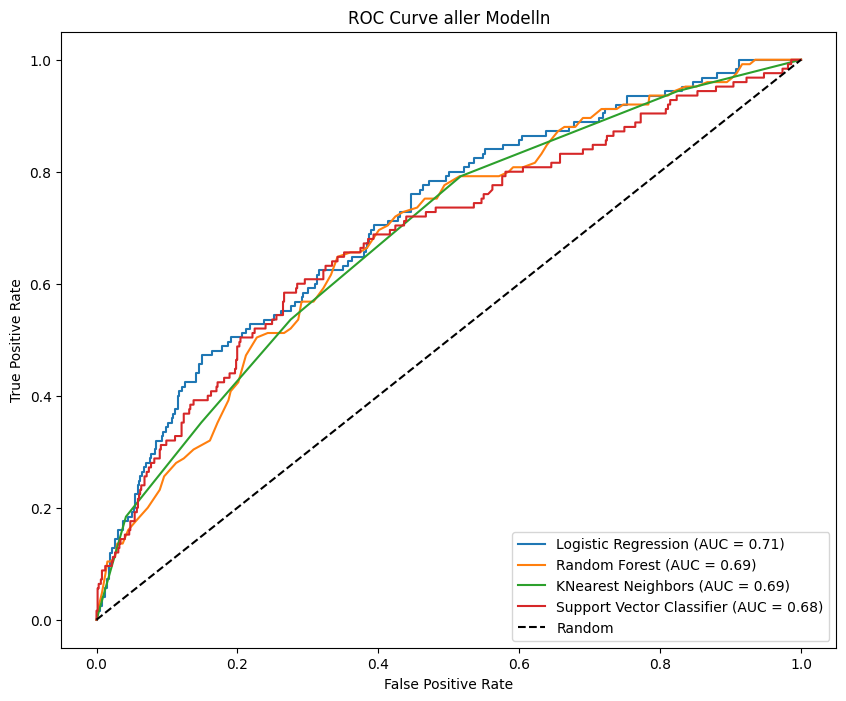

In [444]:

from sklearn.metrics import roc_curve, auc

def plot_roc_curves(X_train, y_train, X_test, y_test):
    models = [
        ('Logistic Regression', LogisticRegression()), 
        ('Random Forest', RandomForestClassifier()),
        ('KNearest Neighbors', KNeighborsClassifier()),
        ('Support Vector Classifier', SVC(probability=True))  # Aktiviere Wahrscheinlichkeiten für SVC
    ]
   

    plt.figure(figsize=(10, 8))

    for model_name, model in models:
        
        # Trainiere das Modell auf den resamplten Daten
        model.fit(X_train, y_train)

        # Überprüfe, ob das Modell die Methode predict_proba hat
        if hasattr(model, 'predict_proba'):
            # Berechne ROC-Kurve
            y_prob = model.predict_proba(X_test)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)

            # Plotte ROC-Kurve
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        else:
            print(f"{model_name} unterstützt keine predict_proba-Methode.")

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve aller Modelln')
    plt.legend(loc='lower right')
    plt.show()

# Verwendung der Funktion
plot_roc_curves(X_resampled, y_resampled, X_test_scaled, y_test)


# 4. Verwendung der Vorhersagen aus dem ML -Modell


In [445]:
# Logistische Regression
model_lr = LogisticRegression()
model_lr.fit(X_resampled, y_resampled)

# Klassenlabels direkt vorhersagen (ohne Schwellenwertanpassung)
y_pred_lr = model_lr.predict(X_test_scaled)

# Genauigkeit und andere Metriken berechnen
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print(f"Logistische Regression - Genauigkeit: {accuracy_lr}")
print(f"Logistische Regression - Confusion Matrix:\n{confusion_mat_lr}")
print(f"Logistische Regression - Classification Report:\n{classification_rep_lr}")



Logistische Regression - Genauigkeit: 0.5888456549935149
Logistische Regression - Confusion Matrix:
[[363 283]
 [ 34  91]]
Logistische Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.56      0.70       646
           1       0.24      0.73      0.36       125

    accuracy                           0.59       771
   macro avg       0.58      0.64      0.53       771
weighted avg       0.81      0.59      0.64       771



### Hyperparameter-Optimierung

Im Rahmen der Hyperparameter-Optimierung für logistische Regression 
* Regularisierung: 
    Logistische Regression hat Hyperparameter für die Regularisierung, wie z.B. den Inversionskoeffizienten C. Ein kleinerer C-Wert erhöht die Regularisierung und könnte Overfitting verhindern. 
    Grid Search verwenden, um den besten Wert für C zu finden.

In [447]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)
best_C = grid_search.best_params_['C']
best_C

100

In [448]:
# Erstellen und trainieren das logistische Regressionsmodell mit dem besten C-Wert
best_lr_model = grid_search.best_estimator_

# Vorhersagen auf den Testdaten
y_pred = best_lr_model.predict(X_test_scaled)

# die Metriken zeigen
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Logistische Regression mit optimierten Hyperparametern:")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")


Logistische Regression mit optimierten Hyperparametern:
Accuracy: 0.5888456549935149
Confusion Matrix:
[[364 282]
 [ 35  90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.56      0.70       646
           1       0.24      0.72      0.36       125

    accuracy                           0.59       771
   macro avg       0.58      0.64      0.53       771
weighted avg       0.80      0.59      0.64       771



Genauigkeit vor der Hyperparameter-Optimierung: 0.589  Confusion Matrix und Classification Report geben einen Überblick über die Modellleistung.  Modellleistung nach der Optimierung (C=100): Genauigkeit weiterhin bei 0.589.
Confusion Matrix und Classification Report zeigen minimale Veränderungen.  Optimierung des Hyperparameters in diesem Fall nicht zu einer signifikanten Verbesserung geführt hat.
s gibt mehrere mögliche Gründe, warum die Hyperparameter-Optimierung in deinem Fall nicht zu einer signifikanten Verbesserung geführt haben könnte:

 * Bereits gut eingestellte Hyperparameter:

Es ist möglich, dass die ursprünglichen Hyperparameter der logistischen Regression bereits relativ gut eingestellt waren. In diesem Fall könnte eine weitere Optimierung nur zu marginalen Verbesserungen führen.

 * Ungünstige Datenstruktur:

Die Struktur der Daten könnte dazu führen, dass das Modell nicht stark von Hyperparameter-Optimierungen profitiert. 
Dies kann insbesondere der Fall sein, wenn die zugrunde liegende Datenverteilung oder die Trennbarkeit zwischen den Klassen begrenzt ist.
 
 * Begrenzte Anzahl von Hyperparametern:

Bei der logistischen Regression gibt es nur begrenzte Hyperparameter, die optimiert werden können. Manchmal kann die begrenzte Anzahl von Hyperparametern die Möglichkeiten für erhebliche Verbesserungen einschränken.

 * Weitere Features oder Modelle könnten erforderlich sein:

In einigen Fällen kann die Performance des Modells nicht nur durch die Hyperparameter beeinflusst werden, sondern auch durch die Qualität der verfügbaren Features oder die Wahl des Modells selbst. Es könnte sich lohnen, andere Modelle zu erkunden oder zusätzliche Features zu berücksichtigen.

In [451]:
model_rf2 = RandomForestClassifier()
model_rf2.fit(X_resampled, y_resampled)

# Klassenlabels direkt vorhersagen (ohne Schwellenwertanpassung)
y_pred_rf2 = model_rf2.predict(X_test_scaled)

# Genauigkeit und andere Metriken berechnen
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
confusion_mat_rf2 = confusion_matrix(y_test, y_pred_rf2)
classification_rep_rf2 = classification_report(y_test, y_pred_rf2)

print(f"Random Forest - Genauigkeit: {accuracy_rf2}")
print(f"Random Forest - Confusion Matrix:\n{confusion_mat_rf2}")
print(f"Random Forest - Classification Report:\n{classification_rep_rf2}")



Random Forest - Genauigkeit: 0.5214007782101168
Random Forest - Confusion Matrix:
[[306 340]
 [ 29  96]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.47      0.62       646
           1       0.22      0.77      0.34       125

    accuracy                           0.52       771
   macro avg       0.57      0.62      0.48       771
weighted avg       0.80      0.52      0.58       771



### Hyperparameter-Optimierung


In [453]:
from sklearn.model_selection import GridSearchCV

# Parameter-Raum eingeben
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#  RandomForestClassifier erstellen
rf_model = RandomForestClassifier()

# GridSearchCV-Objekt instanz erstellen
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# fit 
grid_search.fit(X_resampled, y_resampled)

# Zeige die besten Hyperparameter an
print("Beste Hyperparameter:", grid_search.best_params_)

# Trainiere ein Modell mit den besten Hyperparametern
best_rf_model = grid_search.best_estimator_

# Mache Vorhersagen auf den Testdaten
y_pred_best_rf = best_rf_model.predict(X_test_scaled)


Beste Hyperparameter: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [454]:
# Genauigkeit und andere Metriken berechnen
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
confusion_mat_best_rf = confusion_matrix(y_test,y_pred_best_rf )
classification_best_rf = classification_report(y_test, y_pred_best_rf)

print(f"Random Forest - Genauigkeit : {accuracy_best_rf}")
print(f"Random Forest - Confusion Matrix:\n{confusion_mat_best_rf}")
print(f"Random Forest - Classification Report:\n{classification_best_rf}")



Random Forest - Genauigkeit : 0.5123216601815823
Random Forest - Confusion Matrix:
[[296 350]
 [ 26  99]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.46      0.61       646
           1       0.22      0.79      0.34       125

    accuracy                           0.51       771
   macro avg       0.57      0.63      0.48       771
weighted avg       0.81      0.51      0.57       771



das Model Random Forest mit den besten Hyperparameter hat eine bessere Ergebnisse bzgl. Recall.

# 5. Verbesserungsvorschläge

Es ist wichtig anzumerken, dass das Thema der Herz-Kreislauf-Erkrankungen äußerst komplex ist und von vielen Faktoren beeinflusst wird. Im Gesundheitswesen werden in der Regel keine absoluten Werte, sondern eher Wahrscheinlichkeiten verwendet, um die Unsicherheit und Vielschichtigkeit dieser Erkrankungen widerzuspiegeln. Unsere Analyse basiert auf statistischen Modellen und kann als Hilfsmittel zur Bewertung von Risikofaktoren dienen. Dennoch sollte sie nicht als definitive Diagnose oder Vorhersage interpretiert werden. 

1. **Individuelle Unterschiede:**
   - Jeder Mensch ist einzigartig, und die individuellen Unterschiede können erheblichen Einfluss auf die Gesundheit haben. Ein Modell kann allgemeine Trends aufzeigen, aber es kann nicht alle individuellen Aspekte berücksichtigen.

2. **Dynamik der Gesundheit:**
   - Die Gesundheit ist eine dynamische Angelegenheit, die sich im Laufe der Zeit verändern kann. Ein Modell basiert auf den vorliegenden Daten und bietet eine Momentaufnahme. Zukünftige Entwicklungen und Änderungen im Lebensstil können die Vorhersagen beeinflussen.

3. **Kontinuierliche Forschung:**
   - Die medizinische Forschung und Technologie entwickeln sich kontinuierlich weiter. Neue Erkenntnisse können zu einer verbesserten Risikobewertung und präventiven Maßnahmen führen. Daher ist es wichtig, auf dem neuesten Stand der Forschung zu bleiben.

4. **Beratung durch Fachleute:**
   - Die Interpretation von Gesundheitsdaten erfordert Fachkenntnisse. Es ist ratsam, die Ergebnisse mit Gesundheitsdienstleistern zu besprechen, die in der Lage sind, die Informationen in einen umfassenden Kontext zu setzen.

5. **Betrachten zusatzliche Merkmalen:**

    - Die vorliegende Analyse basiert auf einer spezifischen Gruppe von Merkmalen, die für die vorliegende Datenmenge verfügbar waren. Gesundheitsbewertungen sollten jedoch idealerweise eine umfassende Palette von Faktoren berücksichtigen. Zusätzliche Aspekte, die möglicherweise nicht in den vorliegenden Daten enthalten sind, könnten einen erheblichen Einfluss auf die Gesundheit haben (Genetik,Stress,Alkoholkonsum,Bewegungsmangel). 




Die vorliegende Analyse bietet Raum für zukünftige Verbesserungen und Erweiterungen. 
Im Hinblick darauf könnten folgende Maßnahmen in Erwägung gezogen werden:

1. **Weitere Hyperparameter-Optimierung:**
   - Eine gründliche Exploration von Hyperparametern, insbesondere in Bezug auf die logistische Regression, könnte die Modellleistung weiter steigern. Es könnte auch sinnvoll sein, alternative Modelle mit erweiterten Anpassungsmöglichkeiten zu evaluieren.

2. **Feature Engineering:**
   - Eine tiefere Untersuchung des Feature Engineerings könnte durchgeführt werden, um neue relevante Features zu schaffen oder bestehende Features in effektivere Formen zu transformieren.

3. **Einbeziehung von Domänenexperten:**
   - Die Zusammenarbeit mit Fachleuten im Bereich der Herz-Kreislauf-Erkrankungen könnte wertvolles domänenspezifisches Wissen in die Modellentwicklung einbringen und sicherstellen, dass relevante Faktoren angemessen berücksichtigt werden.
   
4. **Integration weiterer Datenquellen:**
   - Eine Erweiterung der Datenbasis durch die Einbindung weiterer relevanter Datenquellen könnte eine ganzheitlichere Betrachtung ermöglichen und somit zu präziseren Vorhersagen führen.


5. **Feintuning der Resampling-Methoden:**
   - Bei Verwendung von Resampling-Techniken ist ein genaues Feintuning der Parameter oder die Erprobung unterschiedlicher Varianten zu empfehlen, um die optimale Klassenbalance zu erreichen.

6. **Analyse der Modellfehler:**
   - Eine detaillierte Analyse der Modellfehler kann dazu beitragen, Muster in den falsch klassifizierten Beispielen zu erkennen und somit mögliche Ursachen für Inkonsistenzen zu identifizieren.
